In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

## All races (wtd and non) combined final table

In [2]:
df = pd.read_excel('overall_hist_table.xlsx')
df = df[(df['Party'] == 'Democrat') & 
        (df['Metric'] == 'RMSE_0-100%') &
        (df['Weighting.Method'] == 'CES-Provided Weights')]

# Pivot the dataframe to create a table with years as rows and races as columns
pivot_table = df.pivot_table(index='Year', columns='Race', values='Value', aggfunc='mean')

# 

# Reorder the columns and rename them according to the specified order and labels
column_order = ['President', 'US Senate', 'Governor', 'US House', 'Attorney General', 'Secretary of State', 'State Senator', 'State Representative']
column_labels = ['President', 'U.S. Senate', 'Governor', 'U.S. House', 'Attorney General', 'Secretary of State', 'State Senate', 'State Representative']

# Select and reorder the columns
pivot_table = pivot_table[column_order]

# Rename the columns
pivot_table.columns = column_labels

# Calculate the average across years and add it as a new row
pivot_table.loc['Average'] = pivot_table.mean()

# Calculate the average across races and add it as a new column
pivot_table['Average'] = pivot_table.mean(axis=1)

# Format the table: truncate to one decimal place, replace NaN with "-"
pivot_table = pivot_table.applymap(lambda x: f"{x:.1f}" if isinstance(x, (int, float)) else x).fillna('-')

# Convert the pivot table to LaTeX format
latex_table = pivot_table.to_latex(
    caption='CES-Weighted RMSE for Democratic Vote Share by Office and Year',
    label='tab:rmse_by_race_year',
    column_format='l' + 'c' * (len(pivot_table.columns) - 1) + '|c',
    multirow=True,
    escape=False
)

# Print the LaTeX table
print(latex_table)


\begin{table}
\caption{CES-Weighted RMSE for Democratic Vote Share by Office and Year}
\label{tab:rmse_by_race_year}
\begin{tabular}{lcccccccc|c}
\toprule
 & President & U.S. Senate & Governor & U.S. House & Attorney General & Secretary of State & State Senate & State Representative & Average \\
Year &  &  &  &  &  &  &  &  &  \\
\midrule
2006 & nan & 7.3 & 5.1 & 5.3 & 13.0 & 10.4 & 10.9 & 6.7 & 8.4 \\
2008 & 3.5 & 4.9 & 5.2 & 6.2 & nan & nan & 6.1 & 5.0 & 5.2 \\
2010 & nan & 1.4 & 2.8 & 4.5 & 10.5 & 6.4 & 10.5 & 5.3 & 5.9 \\
2012 & 3.3 & 2.9 & 2.9 & 2.9 & 15.1 & 10.8 & 7.2 & 6.3 & 6.4 \\
2014 & nan & 3.0 & 3.1 & 4.1 & 7.9 & 10.4 & 12.9 & 5.7 & 6.7 \\
2016 & 1.6 & 2.9 & 3.8 & 3.4 & 4.6 & 9.3 & 7.6 & 5.9 & 4.9 \\
2018 & nan & 4.8 & 4.5 & 3.8 & 3.9 & 4.0 & 4.5 & 8.5 & 4.9 \\
2020 & 2.4 & 4.6 & 3.2 & 3.6 & 4.2 & 3.7 & 9.9 & 8.2 & 5.0 \\
2022 & nan & 5.7 & 6.9 & 5.7 & 4.0 & 4.4 & 10.0 & 10.4 & 6.7 \\
Average & 2.7 & 4.2 & 4.2 & 4.4 & 7.9 & 7.4 & 8.9 & 6.9 & 5.8 \\
\bottomrule
\end{tabular}

/var/folders/xf/837xl0rs49194z6g15hkf22m0000gn/T/ipykernel_3856/2211705893.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: f"{x:.1f}" if isinstance(x, (int, float)) else x).fillna('-')


## Final table non weighted races only 

In [3]:
df = pd.read_excel('overall_hist_table.xlsx')
df = df[(df['Party'] == 'Democrat') & 
        (df['Metric'] == 'RMSE_0-100%') & 
        (df['Weighting.Method'] == 'CES-Provided Weights') &
        (~df['Race'].isin(['US Senate', 'President', 'Governor']))]

# Print unique Races
unique_races = df['Race'].unique()
print(unique_races)

# Pivot the dataframe to create a table with years as rows and races as columns
pivot_table = df.pivot_table(index='Year', columns='Race', values='Value', aggfunc='mean')

# Reorder the columns and rename them according to the specified order and labels
column_order = ['US House', 'Attorney General', 'Secretary of State', 'State Senator', 'State Representative']
column_labels = ['U.S. House', 'Attorney General', 'Secretary of State', 'State Senate', 'State Representative']

# Select and reorder the columns
pivot_table = pivot_table[column_order]
print(pivot_table)
# Rename the columns
pivot_table.columns = column_labels

# Calculate the average across years and add it as a new row
pivot_table.loc['Average'] = pivot_table.mean()

# Calculate the average across races and add it as a new column
pivot_table['Average'] = pivot_table.mean(axis=1)

# Format the table: truncate to one decimal place, replace NaN with "-"
pivot_table = pivot_table.applymap(lambda x: f"{x:.1f}" if isinstance(x, (int, float)) else x).fillna('-')

# Convert the pivot table to LaTeX format
latex_table = pivot_table.to_latex(
    caption='CES-Weighted RMSE for Democratic Vote Share by Office and Year',
    label='tab:rmse_by_race_year',
    column_format='l' + 'c' * (len(pivot_table.columns) - 1) + '|c',
    multirow=True,
    escape=False
)

# Print the LaTeX table
print(latex_table)

['Attorney General' 'Secretary of State' 'State Representative'
 'State Senator' 'US House']
Race  US House  Attorney General  Secretary of State  State Senator  \
Year                                                                  
2006  5.349931         13.029006           10.446590      10.948266   
2008  6.236636               NaN                 NaN       6.108571   
2010  4.484702         10.531054            6.381254      10.544882   
2012  2.945518         15.092283           10.756393       7.187307   
2014  4.111247          7.865297           10.417533      12.926267   
2016  3.428714          4.631414            9.261344       7.593073   
2018  3.824252          3.947457            3.987781       4.512526   
2020  3.640432          4.204363            3.742230       9.867440   
2022  5.716128          4.043999            4.357130      10.021665   

Race  State Representative  
Year                        
2006              6.684543  
2008              4.982923  
2010     

/var/folders/xf/837xl0rs49194z6g15hkf22m0000gn/T/ipykernel_3856/2565891578.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: f"{x:.1f}" if isinstance(x, (int, float)) else x).fillna('-')


## Comparison table with CES-reported accuracies

In [4]:
df = pd.read_excel('overall_hist_table.xlsx')

# Trim ending whitespace from the Year and Race columns
df['Race'] = df['Race'].str.strip()

# Filter the dataframe for Democrat party and RMSE from 0-100%
df = df[(df['Party'] == 'Democrat') & 
        (df['Metric'] == 'RMSE_0-100%') &
        (df['Weighting.Method'] == 'CES-Provided Weights') &
        (~df['Race'].isin(['US Senate', 'President', 'Governor']))]

ces_reported_errors_df = pd.read_excel('CES_Reported_Errors.xlsx')

# Trim ending whitespace from the Year and Race columns
ces_reported_errors_df['Race'] = ces_reported_errors_df['Race'].str.strip()

# Print unique values in the "Race" column for both dataframes
print("Unique values in 'Race' column of df:")
print(df['Race'].unique())

print("Unique values in 'Race' column of ces_reported_errors_df:")
print(ces_reported_errors_df['Race'].unique())

# Check if they contain the same elements
if set(df['Race'].unique()) == set(ces_reported_errors_df['Race'].unique()):
    print("Both dataframes contain the same elements in the 'Race' column.")
else:
    print("The dataframes do not contain the same elements in the 'Race' column.")



# Merge the dataframe by Year and Race
comparison_df = pd.merge(df, ces_reported_errors_df, on=['Year', 'Race'])

# export to excel
comparison_df.to_excel('comparison_df.xlsx', index=False)
print(comparison_df)

def generate_latex_table(df):
    years = df['Year'].unique()
    races = ['President', 'Governor', 'Senator', 'Attorney General', 'Secretary of State']
    
    # Start LaTeX table
    latex_table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{cccccccccccccc}\n"
    latex_table += "& \\multicolumn{2}{c}{President} & \\multicolumn{2}{c}{Governor} & \\multicolumn{2}{c}{Senator} & \\multicolumn{2}{c}{Attorney General} & \\multicolumn{2}{c}{Secretary of State} & \\multicolumn{2}{c}{} & \\\\ \\cline{2-15}\n"
    latex_table += "Year & Value & RMSE & Value & RMSE & Value & RMSE & Value & RMSE & Value & RMSE & Value Average & RMSE Average \\\\\n"

    # Iterate over each year and compute the values required
    for year in years:
        latex_table += f"{year} & "
        year_data = df[df['Year'] == year]
        averages = []
        
        for race in races:
            race_data = year_data[year_data['Race'] == race]
            if not race_data.empty:
                value = race_data['Value'].mean()
                rmse = race_data['RMSE'].mean()
                latex_table += f"{value:.2f} & {rmse:.2f} & "
                averages.append((value, rmse))
            else:
                latex_table += "& & "
        
        # Calculate overall averages for the year
        if averages:
            value_avg = sum(v for v, _ in averages) / len(averages)
            rmse_avg = sum(r for _, r in averages) / len(averages)
            latex_table += f"{value_avg:.2f} & {rmse_avg:.2f}"
        latex_table += "\\\\\n"
    
    # Calculate overall averages
    overall_averages = df.groupby('Race')[['Value', 'RMSE']].mean()
    value_average = overall_averages['Value'].mean()
    rmse_average = overall_averages['RMSE'].mean()
    
    latex_table += "& " * (len(races) * 2)
    latex_table += f"& {value_average:.2f} & {rmse_average:.2f} \\\\\n"
    
    # Close LaTeX table
    latex_table += "\\end{tabular}\n\\caption{Comparison of RMSE values}\n\\label{tab:rmse_comparison}\n\\end{table}"
    
    return latex_table

latex_string = generate_latex_table(comparison_df)
print(latex_string)



Unique values in 'Race' column of df:
['Attorney General' 'Secretary of State' 'State Representative'
 'State Senator' 'US House']
Unique values in 'Race' column of ces_reported_errors_df:
['Governor' 'US Senate' 'Attorney General' 'Secretary of State'
 'President']
The dataframes do not contain the same elements in the 'Race' column.
    Year     Party      Weighting.Method       Metric      Value  \
0   2006  Democrat  CES-Provided Weights  RMSE_0-100%  13.029006   
1   2006  Democrat  CES-Provided Weights  RMSE_0-100%  10.446590   
2   2010  Democrat  CES-Provided Weights  RMSE_0-100%  10.531054   
3   2010  Democrat  CES-Provided Weights  RMSE_0-100%   6.381254   
4   2012  Democrat  CES-Provided Weights  RMSE_0-100%  15.092283   
5   2012  Democrat  CES-Provided Weights  RMSE_0-100%  10.756393   
6   2016  Democrat  CES-Provided Weights  RMSE_0-100%   4.631414   
7   2016  Democrat  CES-Provided Weights  RMSE_0-100%   9.261344   
8   2018  Democrat  CES-Provided Weights  RMSE_0-10

## Democrat 100%

Weighting.Method   ANESRake  CES-Provided Weights  CES-Unweighted
Year                                                             
2006               9.565681              9.291667        9.064924
2008               6.438433              5.776043        6.438433
2010               7.918347              7.441239        7.918347
2012               8.133542              8.450091        8.133542
2014               9.424410              8.199557        9.424410
2016               7.928432              6.162681        7.928432
2018               7.538012              4.949667        7.560949
2020              11.412541              5.924227       11.412541
2022              11.161002              6.915806       11.295586


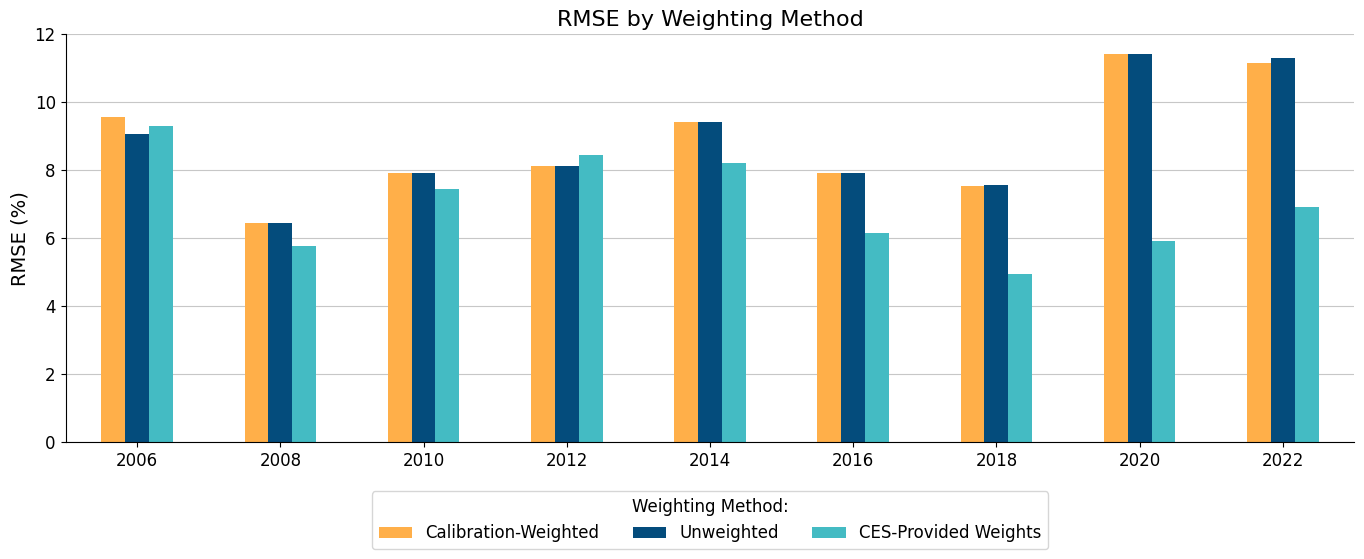

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('overall_hist_table.xlsx')

# Filter dataframe to include only Democrat party and RMSE from 0-100%
df = df[(df['Party'] == 'Democrat') & 
        (df['Metric'] == 'RMSE_0-100%') & 
        (~df['Race'].isin(['US Senate', 'President', 'Governor']))]

# Compute the average RMSE for each year and weighting method
average_rmse = df.groupby(['Year', 'Weighting.Method'])['Value'].mean().unstack()

print(average_rmse)

# Ensure the columns are in the order: ANESRake, CES-Unweighted, CES-Provided Weights
column_order = ['ANESRake', 'CES-Unweighted', 'CES-Provided Weights']
average_rmse = average_rmse[column_order]

# Plotting the histogram
colors = ['#ffaf49', '#044c7c', '#44bbc3']  # New color palette
ax = average_rmse.plot(kind='bar', figsize=(14, 6), color=colors, zorder=2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set X-axis labels to be full years and horizontal
ax.set_xticklabels(average_rmse.index, rotation=0)

# Add axis labels and set title to blank with larger font size
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)
plt.title('RMSE by Weighting Method', fontsize=16)

# Add horizontal grid lines behind the bars with a maximum at 12
ax.set_ylim(0, 12)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Move legend to bottom and make it horizontal with larger font size
plt.legend(title='Weighting Method:', labels=['Calibration-Weighted', 'Unweighted', 'CES-Provided Weights'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12, title_fontsize=12)

# Adjust layout to make room for the legend and reduce extra space
plt.tight_layout(pad=2.0)

# Save the plot as a file
plt.savefig('average_rmse_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Excluding Calibration Weighted

Weighting.Method   ANESRake  CES-Provided Weights  CES-Unweighted
Year                                                             
2006               9.565681              9.291667        9.064924
2008               6.438433              5.776043        6.438433
2010               7.918347              7.441239        7.918347
2012               8.133542              8.450091        8.133542
2014               9.424410              8.199557        9.424410
2016               7.928432              6.162681        7.928432
2018               7.538012              4.949667        7.560949
2020              11.412541              5.924227       11.412541
2022              11.161002              6.915806       11.295586


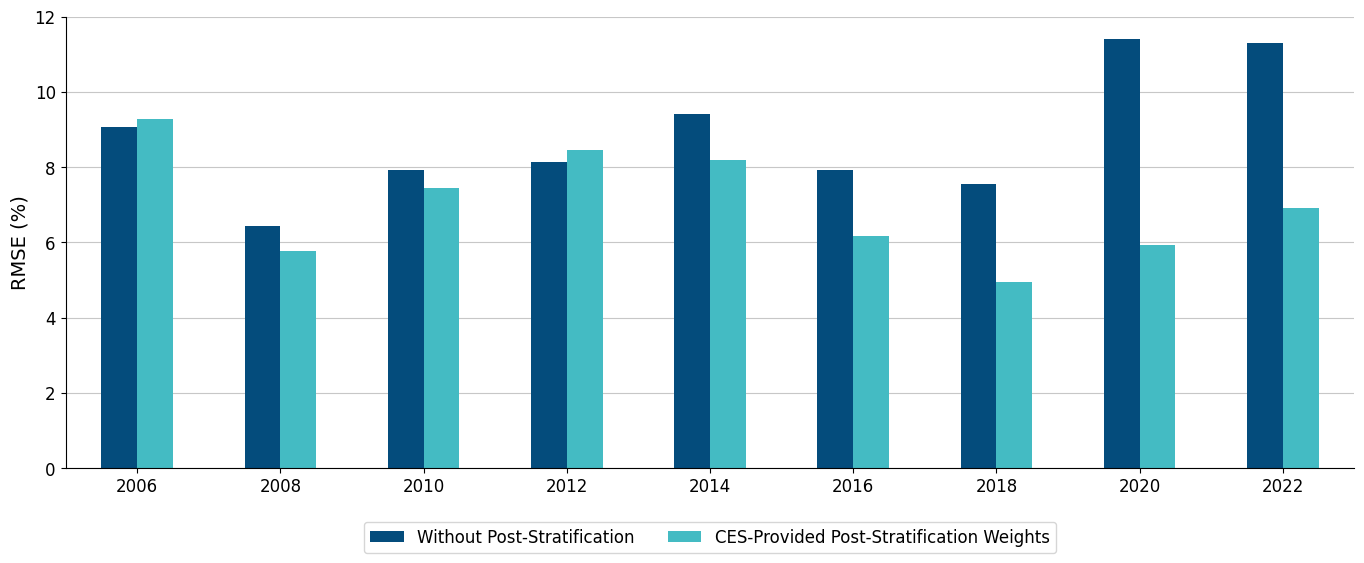

In [54]:

# Read the Excel file
df = pd.read_excel('overall_hist_table.xlsx')

# Filter dataframe to include only Democrat party and RMSE from 0-100%
df = df[(df['Party'] == 'Democrat') & 
        (df['Metric'] == 'RMSE_0-100%') & 
        (~df['Race'].isin(['US Senate', 'President', 'Governor']))]

# Compute the average RMSE for each year and weighting method
average_rmse = df.groupby(['Year', 'Weighting.Method'])['Value'].mean().unstack()

print(average_rmse)

# Ensure the columns are in the order: CES-Unweighted, CES-Provided Weights
column_order = ['CES-Unweighted', 'CES-Provided Weights']
average_rmse = average_rmse[column_order]

# Plotting the histogram
colors = ['#044c7c', '#44bbc3']  # Updated color palette for two bars
ax = average_rmse.plot(kind='bar', figsize=(14, 6), color=colors, zorder=2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set X-axis labels to be full years and horizontal
ax.set_xticklabels(average_rmse.index, rotation=0)

# Add axis labels and set title to blank with larger font size
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)
#plt.title('RMSE by Weighting Method', fontsize=16)

# Add horizontal grid lines behind the bars with a maximum at 12
ax.set_ylim(0, 12)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Move legend to bottom and make it horizontal with larger font size
plt.legend( labels=['Without Post-Stratification', 'CES-Provided Post-Stratification Weights'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=12, title_fontsize=12)

# Adjust layout to make room for the legend and reduce extra space
plt.tight_layout(pad=2.0)

# Save the plot as a file
plt.savefig('average_rmse_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# ALL accuracies (races + demo + non demo)

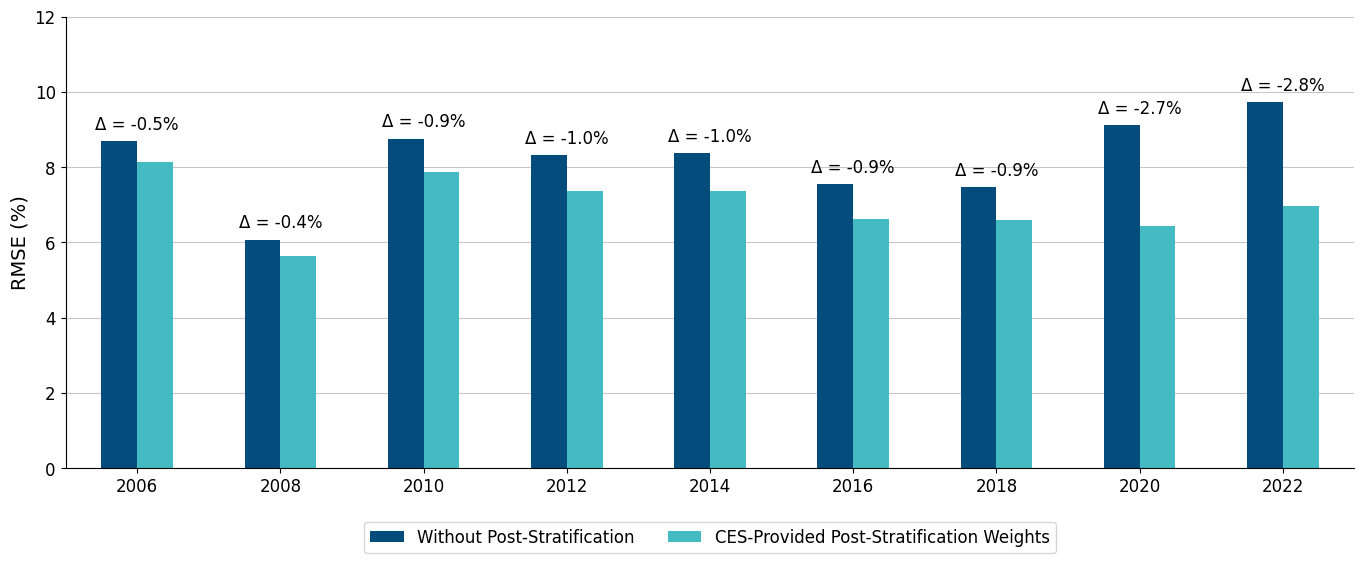

In [58]:
# Read the Excel file
df = pd.read_excel('all_accuracies_rmse_table.xlsx')

# Rename columns for consistency if needed
df = df.rename(columns=lambda x: x.strip())

# Ensure the relevant columns exist
required_columns = ['Year', 'Weighting Method', 'RMSE']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Missing one of the required columns: {required_columns}")

# Pivot the table to have Weighting Method as columns, Year as index, and RMSE as values
rmse_table = df.pivot(index='Year', columns='Weighting Method', values='RMSE')

# Calculate differences between CES-Provided Weights and CES-Unweighted
differences = rmse_table['CES-Provided Weights'] - rmse_table['CES-Unweighted']

# Define the order of columns to plot, excluding ANESRake
column_order = ['CES-Unweighted', 'CES-Provided Weights']  # Flipped order
colors = ['#044c7c', '#44bbc3']  # Flipped colors to match new order

# Plotting the histogram
ax = rmse_table[column_order].plot(kind='bar', figsize=(14, 6), color=colors, zorder=2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set X-axis labels to be full years and horizontal
ax.set_xticklabels(rmse_table.index, rotation=0)

# Add axis labels and set title to blank with larger font size
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)

# Add horizontal grid lines behind the bars with a maximum at 12
ax.set_ylim(0, 12)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add difference values above bars
for i, year in enumerate(rmse_table.index):
    diff = differences[year]
    # Get the height of the taller bar (CES-Unweighted)
    bar_height = rmse_table['CES-Unweighted'][year]
    ax.text(i, bar_height + 0.2, f'Δ = {diff:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

# Move legend to bottom and make it horizontal with larger font size
legend_labels = ['Without Post-Stratification', 'CES-Provided Post-Stratification Weights']  # Flipped order
plt.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=12, title_fontsize=12)

# Adjust layout to make room for the legend and reduce extra space
plt.tight_layout(pad=2.0)

# Save the plot as a file
plt.savefig('average_rmse_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# 2010 2022 only

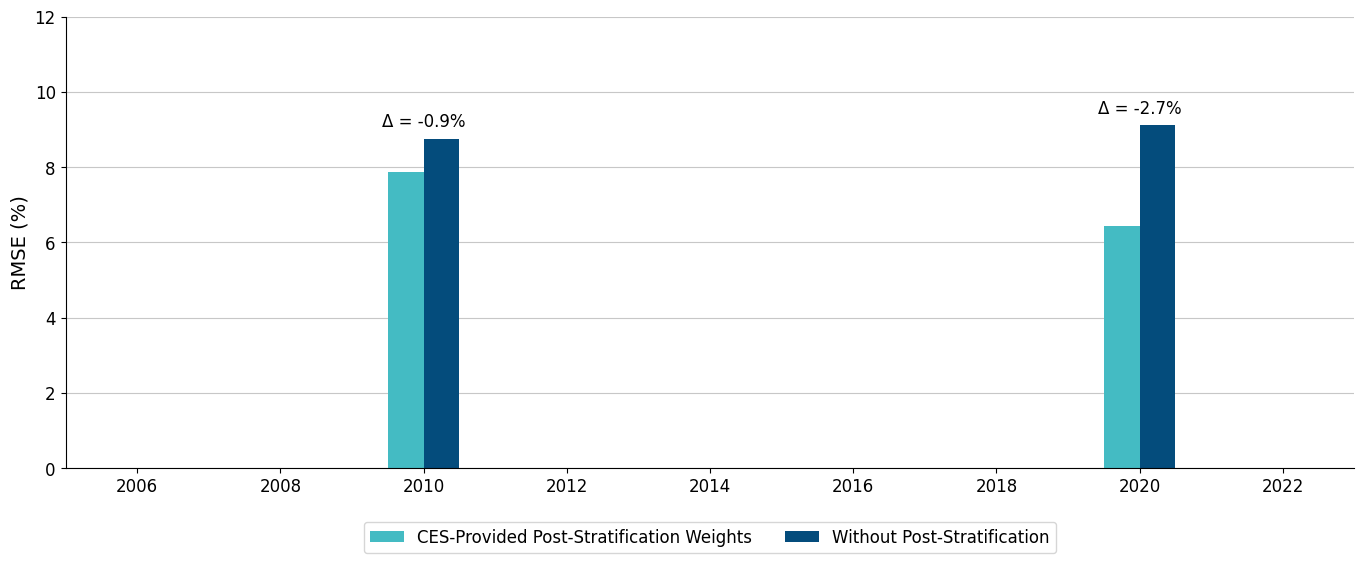

In [55]:
# Read the Excel file
df = pd.read_excel('all_accuracies_rmse_table.xlsx')

# Rename columns for consistency if needed
df = df.rename(columns=lambda x: x.strip())

# Ensure the relevant columns exist
required_columns = ['Year', 'Weighting Method', 'RMSE']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Missing one of the required columns: {required_columns}")

# Create a copy of the full dataframe to maintain all years
rmse_table = df.pivot(index='Year', columns='Weighting Method', values='RMSE')

# Create a copy of rmse_table and set values to 0 for years not in [2010, 2020]
rmse_table_plot = rmse_table.copy()
rmse_table_plot.loc[~rmse_table_plot.index.isin([2010, 2020])] = 0

# Calculate differences between CES-Provided Weights and CES-Unweighted
differences = rmse_table['CES-Provided Weights'] - rmse_table['CES-Unweighted']

# Define the order of columns to plot, excluding ANESRake
column_order = ['CES-Provided Weights', 'CES-Unweighted']
colors = ['#44bbc3', '#044c7c']

# Plotting the histogram using the modified table
ax = rmse_table_plot[column_order].plot(kind='bar', figsize=(14, 6), color=colors, zorder=2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set X-axis labels to be full years and horizontal
ax.set_xticklabels(rmse_table.index, rotation=0)

# Add axis labels and set title to blank with larger font size
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)

# Add horizontal grid lines behind the bars with a maximum at 12
ax.set_ylim(0, 12)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add difference values above bars only for 2010 and 2020
for i, year in enumerate(rmse_table.index):
    if year in [2010, 2020]:
        diff = differences[year]
        # Get the height of the taller bar (CES-Unweighted)
        bar_height = rmse_table['CES-Unweighted'][year]
        ax.text(i, bar_height + 0.2, f'Δ = {diff:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

# Move legend to bottom and make it horizontal with larger font size
legend_labels = ['CES-Provided Post-Stratification Weights', 'Without Post-Stratification']
plt.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=12, title_fontsize=12)

# Adjust layout to make room for the legend and reduce extra space
plt.tight_layout(pad=2.0)

# Save the plot as a file
plt.savefig('average_rmse_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Put labels on without post strat

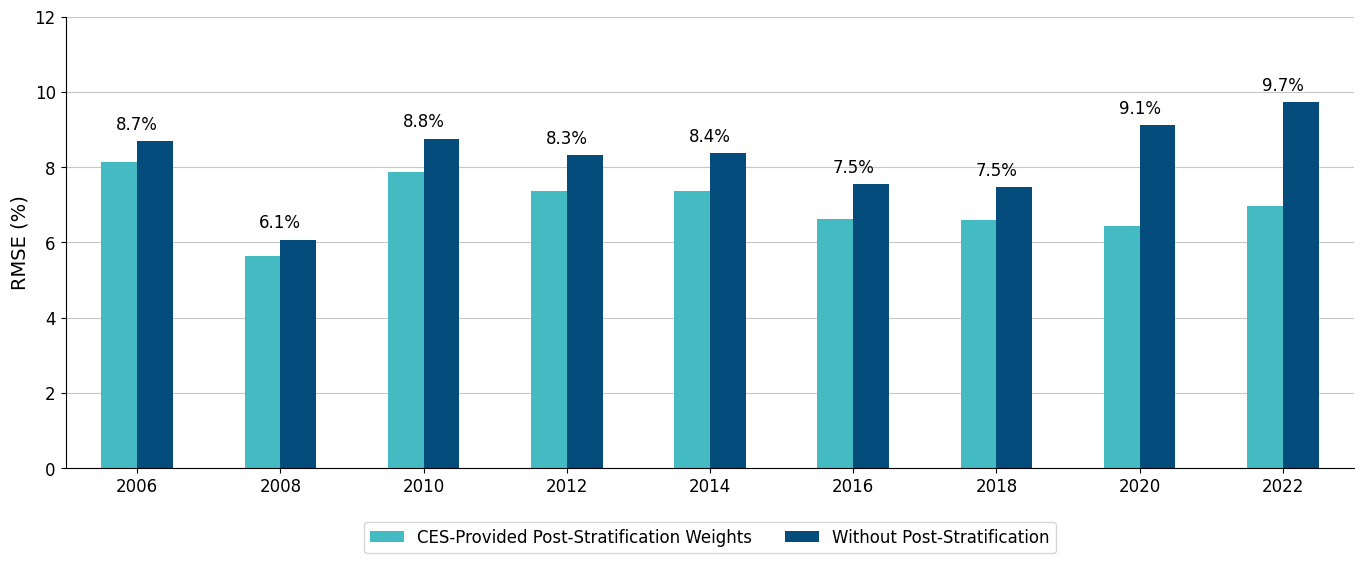

In [56]:
df = pd.read_excel('all_accuracies_rmse_table.xlsx')

# Rename columns for consistency if needed
df = df.rename(columns=lambda x: x.strip())

# Ensure the relevant columns exist
required_columns = ['Year', 'Weighting Method', 'RMSE']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Missing one of the required columns: {required_columns}")

# Pivot the table to have Weighting Method as columns, Year as index, and RMSE as values
rmse_table = df.pivot(index='Year', columns='Weighting Method', values='RMSE')

# Define the order of columns to plot, excluding ANESRake
column_order = ['CES-Provided Weights', 'CES-Unweighted']
colors = ['#44bbc3', '#044c7c']

# Plotting the histogram
ax = rmse_table[column_order].plot(kind='bar', figsize=(14, 6), color=colors, zorder=2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set X-axis labels to be full years and horizontal
ax.set_xticklabels(rmse_table.index, rotation=0)

# Add axis labels and set title to blank with larger font size
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)

# Add horizontal grid lines behind the bars with a maximum at 12
ax.set_ylim(0, 12)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add value labels above the "Without Post-Stratification" bars
for i, year in enumerate(rmse_table.index):
    bar_height = rmse_table['CES-Unweighted'][year]
    ax.text(i, bar_height + 0.2, f'{bar_height:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

# Move legend to bottom and make it horizontal with larger font size
legend_labels = ['CES-Provided Post-Stratification Weights', 'Without Post-Stratification']
plt.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=12, title_fontsize=12)

# Adjust layout to make room for the legend and reduce extra space
plt.tight_layout(pad=2.0)

# Save the plot as a file
plt.savefig('average_rmse_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Demo + non demo + candidate choice CES Weights Only

Weighting Method   ANESRake  CES-Provided Weights  CES-Unweighted
Year                                                             
2006               8.949507              8.147873        8.688843
2008               6.747602              5.637261        6.076236
2010               9.314567              7.869560        8.760242
2012               6.063963              7.358472        8.315055
2014               9.137627              7.353023        8.384453
2016               8.073129              6.622488        7.543720
2018               7.804871              6.586420        7.478528
2020              11.041933              6.438719        9.112416
2022              12.630479              6.954934        9.731316


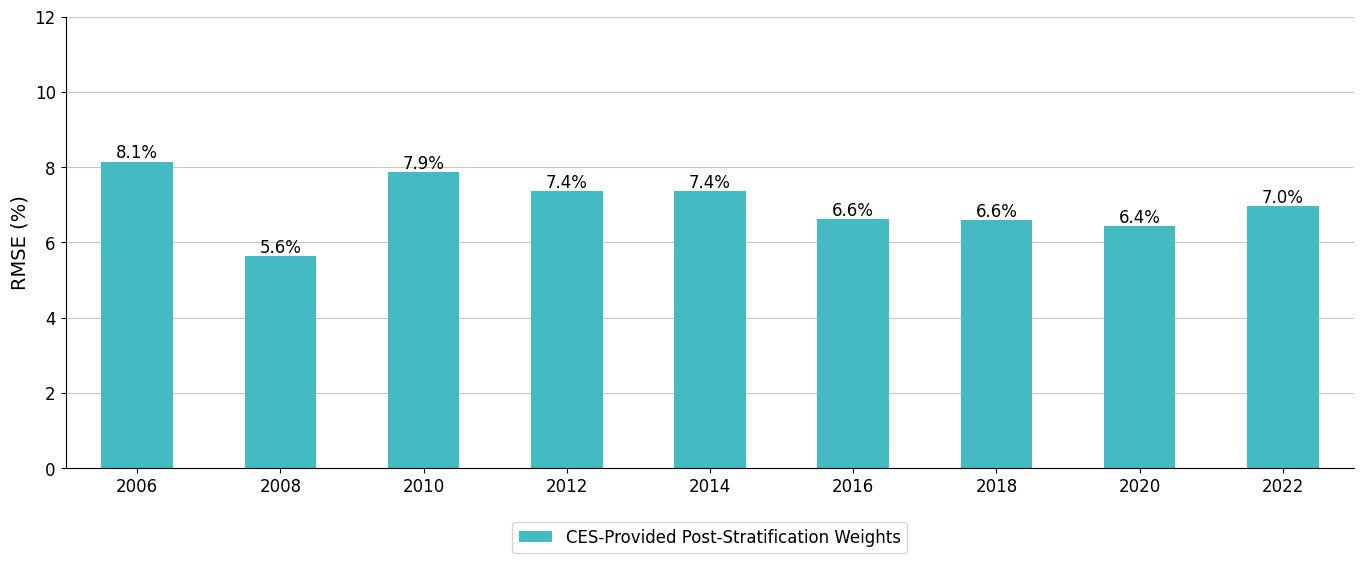

In [57]:
# Read the Excel file
df = pd.read_excel('all_accuracies_rmse_table.xlsx')

# Rename columns for consistency if needed
df = df.rename(columns=lambda x: x.strip())

# Ensure the relevant columns exist
required_columns = ['Year', 'Weighting Method', 'RMSE']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Missing one of the required columns: {required_columns}")

# Pivot the table to have Weighting Method as columns, Year as index, and RMSE as values
average_rmse = df.pivot_table(index='Year', columns='Weighting Method', values='RMSE', aggfunc='mean')

print(average_rmse)

# Only keep CES-Provided Weights column
column_order = ['CES-Provided Weights']
average_rmse = average_rmse[column_order]

# Plotting the histogram
ax = average_rmse.plot(kind='bar', figsize=(14, 6), color='#44bbc3', zorder=2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set X-axis labels to be full years and horizontal
ax.set_xticklabels(average_rmse.index, rotation=0)

# Add axis labels and set title to blank with larger font size
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)

# Add horizontal grid lines behind the bars with a maximum at 12
ax.set_ylim(0, 12)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add value labels on top of each bar
for i, v in enumerate(average_rmse['CES-Provided Weights']):
    ax.text(i, v + 0.1, f'{v:.1f}%', ha='center', fontsize=12)

# Add legend at the bottom center
plt.legend(['CES-Provided Post-Stratification Weights'], 
           loc='upper center', 
           bbox_to_anchor=(0.5, -0.1), 
           ncol=1, 
           fontsize=12)

# Adjust layout to make room for the legend and reduce extra space
plt.tight_layout(pad=2.0)

# Save the plot as a file
plt.savefig('average_rmse_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Weighting Method   ANESRake  CES-Provided Weights  CES-Unweighted
Year                                                             
2006               8.949507              8.147873        8.688843
2008               6.747602              5.637261        6.076236
2010               9.314567              7.869560        8.760242
2012               6.063963              7.358472        8.315055
2014               9.137627              7.353023        8.384453
2016               8.073129              6.622488        7.543720
2018               7.804871              6.586420        7.478528
2020              11.041933              6.438719        9.112416
2022              12.630479              6.954934        9.731316


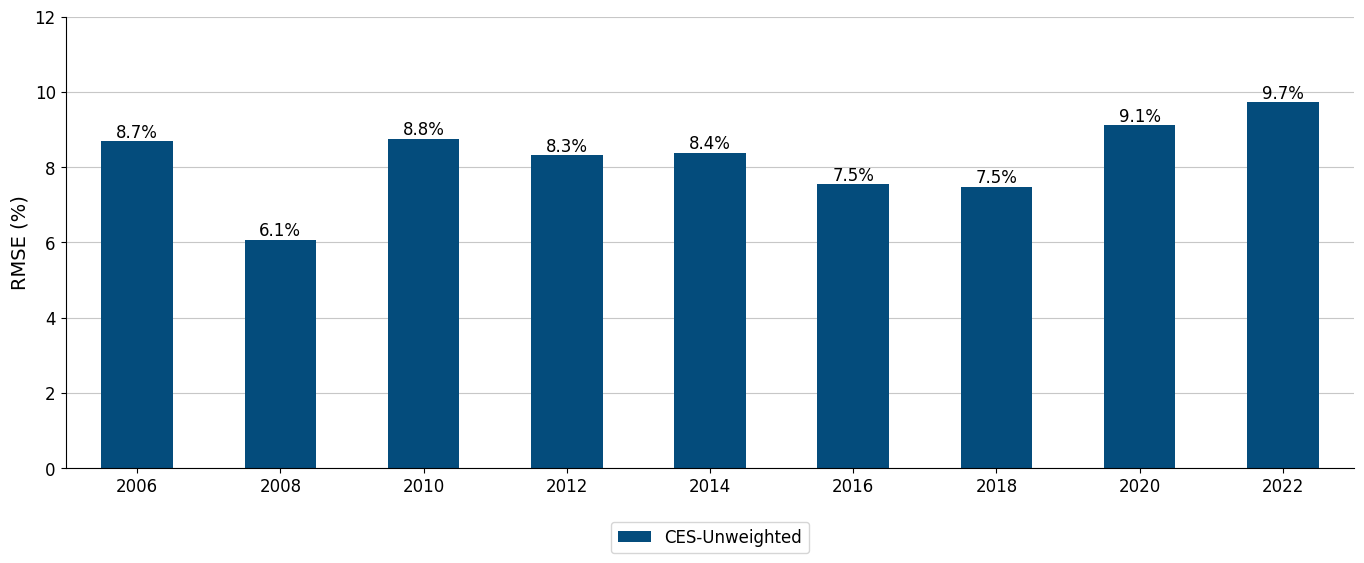

In [61]:
# Read the Excel file
df = pd.read_excel('all_accuracies_rmse_table.xlsx')

# Rename columns for consistency if needed
df = df.rename(columns=lambda x: x.strip())

# Ensure the relevant columns exist
required_columns = ['Year', 'Weighting Method', 'RMSE']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Missing one of the required columns: {required_columns}")

# Pivot the table to have Weighting Method as columns, Year as index, and RMSE as values
average_rmse = df.pivot_table(index='Year', columns='Weighting Method', values='RMSE', aggfunc='mean')

print(average_rmse)

# Only keep CES-Unweighted column
column_order = ['CES-Unweighted']
average_rmse = average_rmse[column_order]

# Plotting the histogram
ax = average_rmse.plot(kind='bar', figsize=(14, 6), color='#044c7c', zorder=2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set X-axis labels to be full years and horizontal
ax.set_xticklabels(average_rmse.index, rotation=0)

# Add axis labels and set title to blank with larger font size
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)

# Add horizontal grid lines behind the bars with a maximum at 12
ax.set_ylim(0, 12)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add value labels on top of each bar
for i, v in enumerate(average_rmse['CES-Unweighted']):
    ax.text(i, v + 0.1, f'{v:.1f}%', ha='center', fontsize=12)

# Add legend at the bottom center
plt.legend(['CES-Unweighted'], 
           loc='upper center', 
           bbox_to_anchor=(0.5, -0.1), 
           ncol=1, 
           fontsize=12)

# Adjust layout to make room for the legend and reduce extra space
plt.tight_layout(pad=2.0)

# Save the plot as a file
plt.savefig('average_rmse_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# unweighted only

# Testing for significant trend

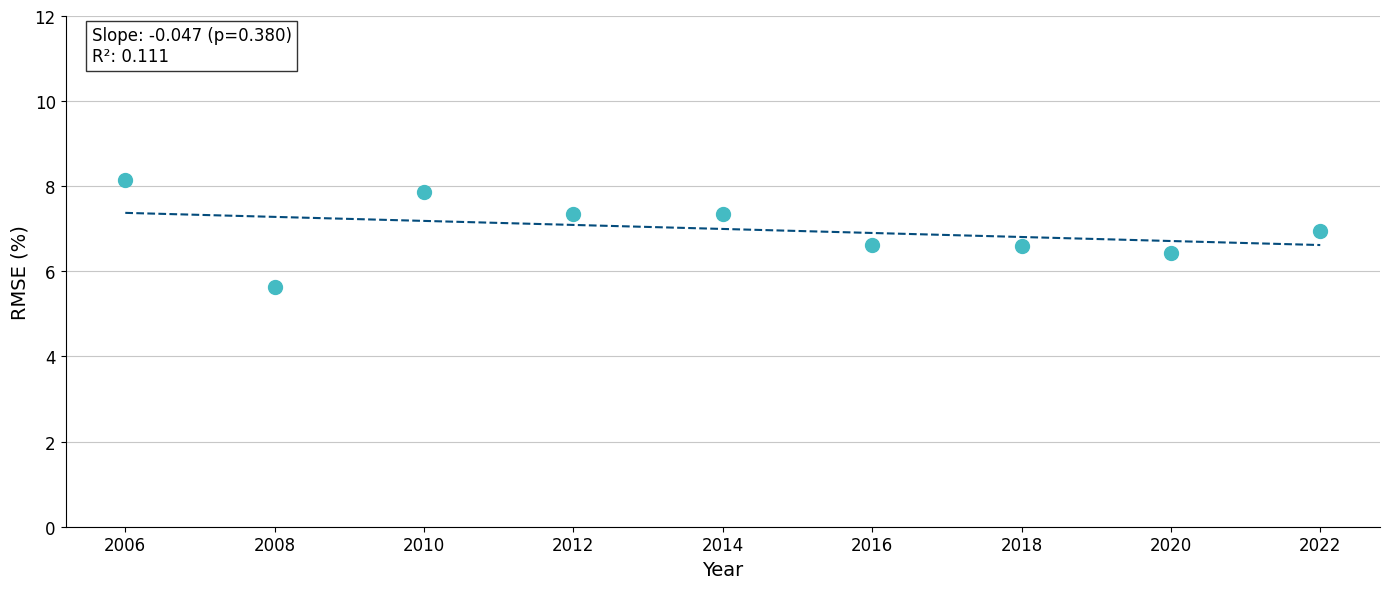


Regression Statistics:
Slope: -0.047
Intercept: 102.152
R-squared: 0.111
P-value: 0.380
Standard Error: 0.050


In [59]:
import pandas as pd
from scipy import stats  # Add this import for stats.linregress

df = pd.read_excel('all_accuracies_rmse_table.xlsx')

# Rename columns for consistency if needed
df = df.rename(columns=lambda x: x.strip())

# Ensure the relevant columns exist
required_columns = ['Year', 'Weighting Method', 'RMSE']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Missing one of the required columns: {required_columns}")

# Filter for CES-Provided Weights only
df_ces = df[df['Weighting Method'] == 'CES-Provided Weights']

# Create scatter plot
plt.figure(figsize=(14, 6))
plt.scatter(df_ces['Year'], df_ces['RMSE'], color='#44bbc3', s=100, zorder=2)

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_ces['Year'], df_ces['RMSE'])

# Plot regression line
x = np.array(df_ces['Year'])
y = slope * x + intercept
plt.plot(x, y, color='#044c7c', linestyle='--', zorder=1)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add axis labels
plt.xlabel('Year', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=0)
plt.ylim(0, 12)

# Set tick parameters
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add regression results as text
regression_text = f'Slope: {slope:.3f} (p={p_value:.3f})\nR²: {r_value**2:.3f}'
plt.text(0.02, 0.98, regression_text, transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('rmse_trend.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print regression statistics
print("\nRegression Statistics:")
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Standard Error: {std_err:.3f}")

# All accuracies, candidate choice only

Weighting Method   ANESRake  CES-Provided Weights  CES-Unweighted
Year                                                             
2006               8.949507              8.540832        8.171820
2008               6.747602              5.287767        6.747602
2010               9.314567              8.403299        9.314567
2012               6.063963              5.853414        6.063963
2014               9.137627              7.528058        9.137627
2016               8.073129              5.266507        8.073129
2018               7.804871              5.588791        7.804871
2020              11.041933              4.684213       11.041933
2022              12.630479              7.542231       12.630479


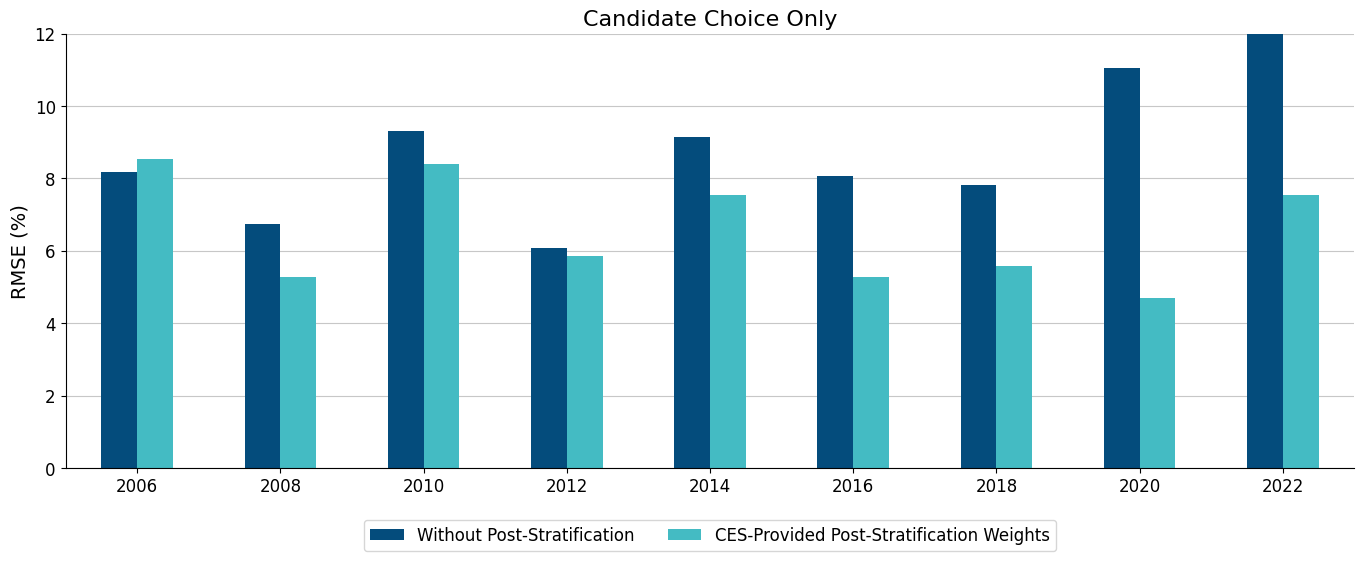

In [6]:
# Read the Excel file
# Read the Excel file with the new structure
df = pd.read_excel('cand_choice_accuracies.xlsx')

# Rename columns for consistency if needed
df = df.rename(columns=lambda x: x.strip())

# Ensure the relevant columns exist
required_columns = ['Year', 'Weighting Method', 'RMSE']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Missing one of the required columns: {required_columns}")

# Pivot the table to have Weighting Method as columns, Year as index, and RMSE as values
average_rmse = df.pivot_table(index='Year', columns='Weighting Method', values='RMSE', aggfunc='mean')

print(average_rmse)

# Ensure the columns are in the order: CES-Unweighted, CES-Provided Weights
column_order = ['CES-Unweighted', 'CES-Provided Weights']
# Only keep columns that exist in the data
column_order = [col for col in column_order if col in average_rmse.columns]
average_rmse = average_rmse[column_order]

# Plotting the histogram
colors = ['#044c7c', '#44bbc3'][:len(column_order)]  # Adjust color palette for available bars
ax = average_rmse.plot(kind='bar', figsize=(14, 6), color=colors, zorder=2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set X-axis labels to be full years and horizontal
ax.set_xticklabels(average_rmse.index, rotation=0)

# Add axis labels and set title to blank with larger font size
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)
plt.title('Candidate Choice Only', fontsize=16)

# Add horizontal grid lines behind the bars with a maximum at 12
ax.set_ylim(0, 12)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Move legend to bottom and make it horizontal with larger font size
legend_labels = []
if 'CES-Unweighted' in column_order:
    legend_labels.append('Without Post-Stratification')
if 'CES-Provided Weights' in column_order:
    legend_labels.append('CES-Provided Post-Stratification Weights')
plt.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=12, title_fontsize=12)

# Adjust layout to make room for the legend and reduce extra space
plt.tight_layout(pad=2.0)

# Save the plot as a file
plt.savefig('average_rmse_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Demo + candidate choice error distributions

Share of races with RMSE > 8%: 17.9%


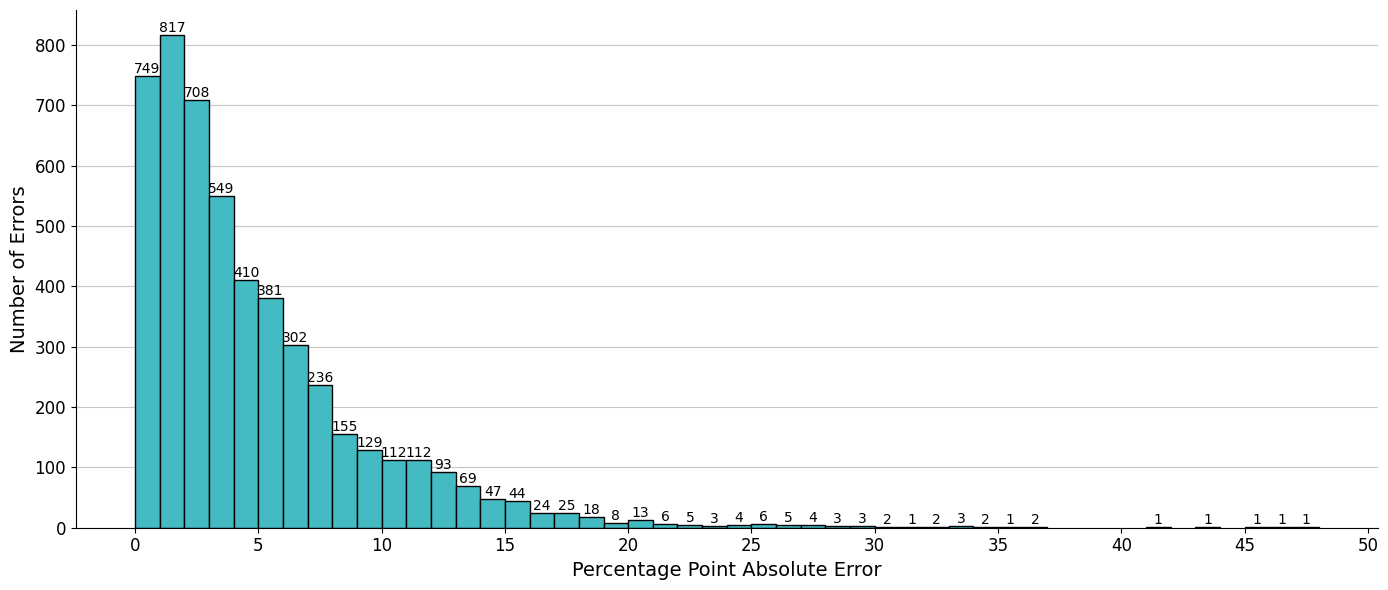

In [60]:
# Read the error bucket table (already bucketed, e.g., columns: 'Weighting Method', 'Error_Bucket', 'Count')
df = pd.read_excel('error_bucket_table.xlsx')

# Filter to only rows where Weighting Method is "CES-Provided Weights"
df = df[df['Weighting Method'] == 'CES-Provided Weights']

# Calculate and print share of races with RMSE > 8%
def bucket_upper_bound(bucket_str):
    import re
    numbers = re.findall(r"[-+]?\d*\.\d+|\d+", str(bucket_str))
    if len(numbers) == 2:
        return float(numbers[1])
    return None

df['Bucket_Upper'] = df['Error_Bucket'].apply(bucket_upper_bound)

# Filter out rows with Bucket_Upper > 50
df = df[df['Bucket_Upper'] <= 50]

total_count = df['Count'].sum()
high_rmse_count = df[df['Bucket_Upper'] > 8]['Count'].sum()
high_rmse_share = (high_rmse_count / total_count) * 100 if total_count > 0 else 0
print(f"Share of races with RMSE > 8%: {high_rmse_share:.1f}%")

# Prepare data for histogram/bar plot
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Calculate bar positions to be centered between tick marks
bar_positions = df['Bucket_Upper'] - 0.5  # Shift bars left by 0.5 to center between ticks

# Plot bar chart using the adjusted positions and counts
bars = ax.bar(bar_positions, df['Count'], width=1.0, color='#44bbc3', edgecolor='black', zorder=2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add axis labels with larger font size
plt.xlabel('Percentage Point Absolute Error', fontsize=14)
plt.ylabel('Number of Errors', fontsize=14)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Set x-axis ticks to show every 5 units
ax.set_xticks(range(0, 51, 5))

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('rmse_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Only Post-Stratified

In [47]:

# Read the Excel file
df = pd.read_excel('overall_hist_table.xlsx')

# Filter dataframe to include only Democrat party and RMSE from 0-100%
df = df[(df['Party'] == 'Democrat') & 
        (df['Metric'] == 'RMSE_0-100%') & 
        (~df['Race'].isin(['US Senate', 'President', 'Governor']))]

# Export the filtered dataframe to Excel

#print(df)
modal_df = pd.read_excel('modal_demo_table.xlsx')
# Reformat to match your original_df structure
modal_df_formatted = modal_df.copy()
modal_df_formatted["Race"] = "Modal Demographics"
modal_df_formatted["Party"] = "All"
modal_df_formatted["Weighting Method"] = "CES-Provided Weights"
modal_df_formatted["Metric"] = "Abs_Diff_CES_CPS_Weighted"
modal_df_formatted["Value"] = modal_df_formatted["Abs_Diff_CES_CPS_Weighted"]

# Select only needed columns, and match order if necessary
modal_df_formatted = modal_df_formatted[[
    "Year", "Race", "State", "Party", "Weighting Method", "Metric", "Value"
]]

df = pd.concat([modal_df_formatted, df], ignore_index=True)

# Compute the average RMSE for each year and weighting method
average_rmse = df.groupby(['Year', 'Weighting.Method'])['Value'].mean().unstack()

# Select only CES-Provided Weights column
average_rmse = average_rmse[['CES-Provided Weights']]

# Plotting the histogram
ax = average_rmse.plot(kind='bar', figsize=(14, 6), color='#44bbc3', zorder=2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set X-axis labels to be full years and horizontal
ax.set_xticklabels(average_rmse.index, rotation=0)

# Add axis labels and set title to blank with larger font size
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)

# Add horizontal grid lines behind the bars with a maximum at 12
ax.set_ylim(0, 12)
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add value labels above each bar
for i, v in enumerate(average_rmse['CES-Provided Weights']):
    ax.text(i, v + 0.2, f'{v:.1f}', ha='center', fontsize=12)

# Add legend with updated text
plt.legend(['CES-Provided Post Stratification Weights'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1, fontsize=12)

# Adjust layout to make room for the legend and reduce extra space
plt.tight_layout(pad=2.0)

# Save the plot as a file
plt.savefig('average_rmse_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

KeyError: 'Abs_Diff_CES_CPS_Weighted'

# Distribution of errors plot

Share of races with RMSE > 12%: 21.4%


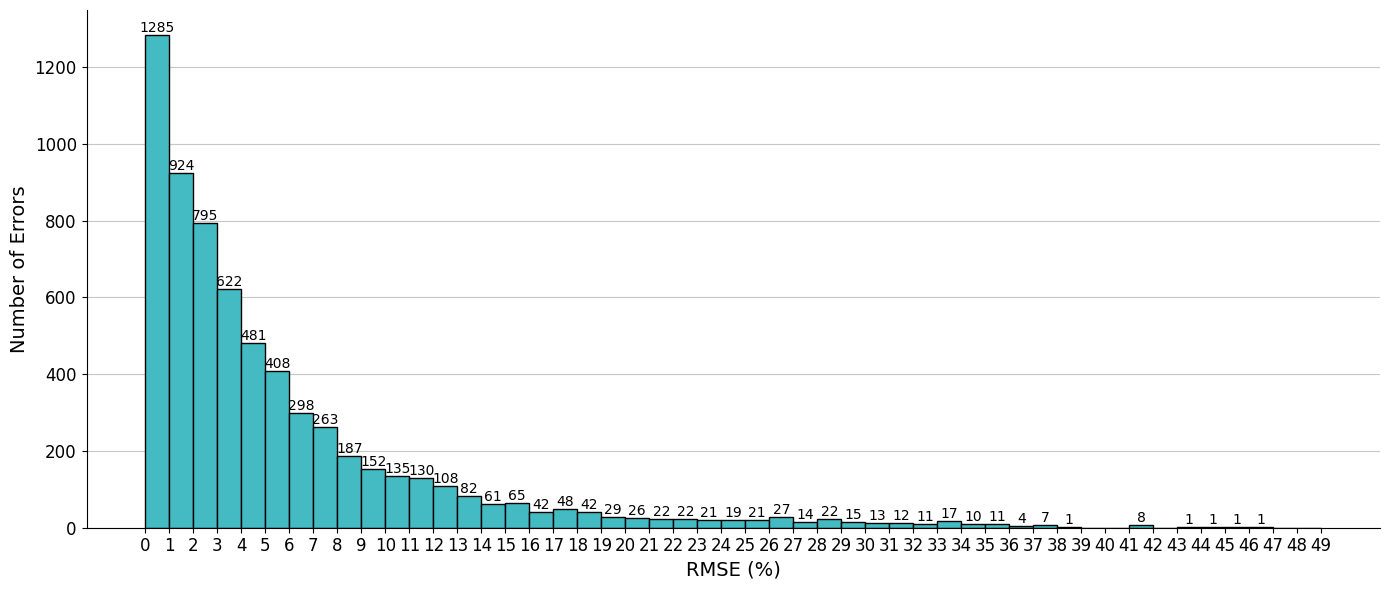

In [41]:
# Read the Excel file
df = pd.read_excel('all_states_hist_table.xlsx')

# Filter dataframe to include only Democrat party and RMSE from 0-100%
df = df[(df['Party'] == 'Democrat') & 
        (df['Metric'] == 'RMSE_0-100%') & 
        (df['Weighting Method'] == 'CES-Provided Weights') &
        (~df['Race'].isin(['US Senate', 'President', 'Governor']))]

df.to_excel('filtered_rmse_data.xlsx', index=False)


#print(df)
modal_df = pd.read_excel('modal_demo_table.xlsx')
# Reformat to match your original_df structure
modal_df_formatted = modal_df.copy()
modal_df_formatted["Race"] = "Modal Demographics"
modal_df_formatted["Party"] = "All"
modal_df_formatted["Weighting Method"] = "CES-Provided Weights"
modal_df_formatted["Metric"] = "Abs_Diff_CES_CPS_Weighted"
modal_df_formatted["Value"] = modal_df_formatted["Abs_Diff_CES_CPS_Weighted"]

# Select only needed columns, and match order if necessary
modal_df_formatted = modal_df_formatted[[
    "Year", "Race", "State", "Party", "Weighting Method", "Metric", "Value"
]]

df = pd.concat([modal_df_formatted, df], ignore_index=True)

# Calculate and print share of races with RMSE > 12%
high_rmse_share = (df['Value'] > 8).mean() * 100
print(f"Share of races with RMSE > 12%: {high_rmse_share:.1f}%")

# Create bins for RMSE values from 0 to 75 in increments of 5
bins = np.arange(0, 50, 1)

# Create histogram of RMSE values
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Plot histogram with specified bins
n, bins, patches = plt.hist(df['Value'], bins=bins, color='#44bbc3', edgecolor='black', zorder=2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add axis labels with larger font size
plt.xlabel('RMSE (%)', fontsize=14)
plt.ylabel('Number of Errors', fontsize=14)

# Set x-axis ticks to match bin edges
plt.xticks(bins)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add value labels on top of each bar
for i, v in enumerate(n):
    if v > 0:  # Only add labels for non-zero bars
        ax.text(bins[i] + 0.5, v, f'{int(v)}', ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('rmse_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Share of races with RMSE > 8% (Modal): 22.7%
Share of races with RMSE > 8% (Original): 17.4%


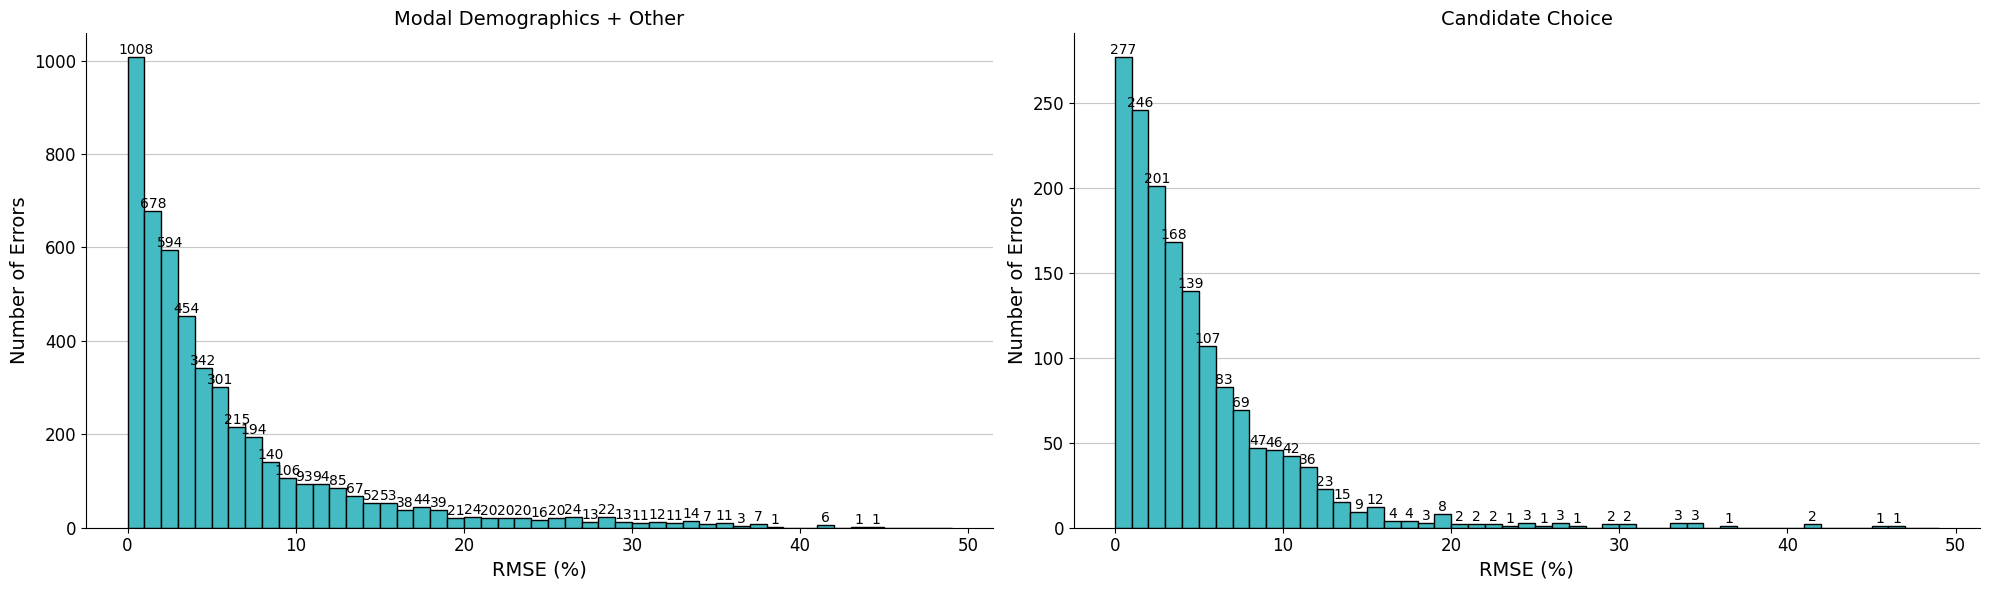

In [42]:
# Read and prepare the data
df = pd.read_excel('all_states_hist_table.xlsx')
modal_df = pd.read_excel('modal_demo_table.xlsx')

# Filter original dataframe
df_filtered = df[(df['Party'] == 'Democrat') & 
                 (df['Metric'] == 'RMSE_0-100%') & 
                 (df['Weighting Method'] == 'CES-Provided Weights') &
                 (~df['Race'].isin(['US Senate', 'President', 'Governor']))]

# Format modal dataframe
modal_df_formatted = modal_df.copy()
modal_df_formatted["Race"] = "Modal Demographics"
modal_df_formatted["Party"] = "All"
modal_df_formatted["Weighting Method"] = "CES-Provided Weights"
modal_df_formatted["Metric"] = "Abs_Diff_CES_CPS_Weighted"
modal_df_formatted["Value"] = modal_df_formatted["Abs_Diff_CES_CPS_Weighted"]
modal_df_formatted = modal_df_formatted[[
    "Year", "Race", "State", "Party", "Weighting Method", "Metric", "Value"
]]

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Create bins for RMSE values
bins = np.arange(0, 50, 1)

# Plot modal demographics histogram
n1, bins1, patches1 = ax1.hist(modal_df_formatted['Value'], bins=bins, 
                              color='#44bbc3', edgecolor='black', zorder=2)
ax1.set_title('Modal Demographics + Other', fontsize=14)
ax1.set_xlabel('RMSE (%)', fontsize=14)
ax1.set_ylabel('Number of Errors', fontsize=14)
ax1.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

# Add value labels for modal demographics
for i, v in enumerate(n1):
    if v > 0:
        ax1.text(bins1[i] + 0.5, v, f'{int(v)}', ha='center', va='bottom', fontsize=10)

# Plot original data histogram
n2, bins2, patches2 = ax2.hist(df_filtered['Value'], bins=bins, 
                              color='#44bbc3', edgecolor='black', zorder=2)
ax2.set_title('Candidate Choice', fontsize=14)
ax2.set_xlabel('RMSE (%)', fontsize=14)
ax2.set_ylabel('Number of Errors', fontsize=14)
ax2.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# Add value labels for original data
for i, v in enumerate(n2):
    if v > 0:
        ax2.text(bins2[i] + 0.5, v, f'{int(v)}', ha='center', va='bottom', fontsize=10)

# Calculate and print share of races with RMSE > 8%
high_rmse_share_modal = (modal_df_formatted['Value'] > 8).mean() * 100
high_rmse_share_original = (df_filtered['Value'] > 8).mean() * 100
print(f"Share of races with RMSE > 8% (Modal): {high_rmse_share_modal:.1f}%")
print(f"Share of races with RMSE > 8% (Original): {high_rmse_share_original:.1f}%")

# Adjust layout and save
plt.tight_layout()
plt.savefig('rmse_distribution_side_by_side.png', dpi=300, bbox_inches='tight')
plt.show()

## Close vs not close races
df = pd.read_excel('overall_hist_table.xlsx')


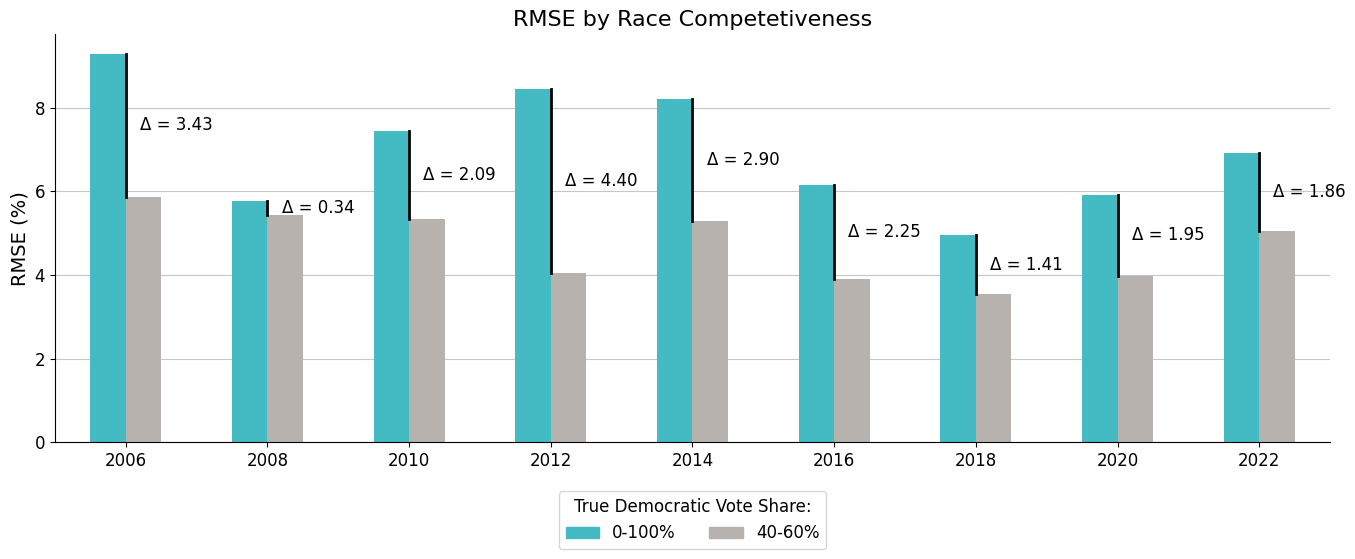

In [6]:
# Read the Excel file
df = pd.read_excel('overall_hist_table.xlsx')

# Filter dataframe to include only Democrat party and RMSE from 0-100%
df_0_100 = df[(df['Party'] == 'Democrat') & 
              (df['Metric'] == 'RMSE_0-100%') & 
              (df['Weighting.Method'] == 'CES-Provided Weights') &
              (~df['Race'].isin(['US Senate', 'President', 'Governor']))]

# Filter dataframe to include only Democrat party and RMSE from 40-60%
df_40_60 = df[(df['Party'] == 'Democrat') & 
               (df['Metric'] == 'RMSE_40-60%') & 
               (df['Weighting.Method'] == 'CES-Provided Weights') &
               (~df['Race'].isin(['US Senate', 'President', 'Governor']))]

# Compute the average RMSE for each year
average_rmse_0_100 = df_0_100.groupby('Year')['Value'].mean()
average_rmse_40_60 = df_40_60.groupby('Year')['Value'].mean()

# Combine the two averages into a single DataFrame
average_rmse = pd.DataFrame({
    'RMSE_0-100': average_rmse_0_100,
    'RMSE_40-60': average_rmse_40_60
})

# Plotting the histogram
colors = ['#44bbc3', '#b8b2ae']  # New color palette for two bars
ax = average_rmse.plot(kind='bar', figsize=(14, 6), color=colors, zorder=2)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set X-axis labels to be full years and horizontal
ax.set_xticklabels(average_rmse.index, rotation=0)

# Add axis labels and set title to blank with larger font size
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)
plt.title('RMSE by Race Competetiveness', fontsize=16)

# Add horizontal grid lines behind the bars
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add a black bracket that spans the height of the difference between the two bars
for i in range(len(average_rmse)):
    y1 = average_rmse.iloc[i]['RMSE_0-100']
    y2 = average_rmse.iloc[i]['RMSE_40-60']
    plt.plot([i, i], [min(y1, y2), max(y1, y2)], color='black', lw=2)  # Vertical line
    plt.text(i + 0.1, (min(y1, y2) + max(y1, y2)) / 2, f'Δ = {abs(y1 - y2):.2f}', ha='left', va='center', fontsize=12, color='black')

# Move legend to bottom and make it horizontal with larger font size
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]  # Create colored squares for legend
plt.legend(handles=handles, title='True Democratic Vote Share:', labels=['0-100%', '40-60%'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=12, title_fontsize=12)

# Adjust layout to make room for the legend and reduce extra space
plt.tight_layout(pad=2.0)

# Save the plot as a file
plt.savefig('rmsebyracecomp.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

## Recouped Accuracy, indep. vs non. indep races

Non-Included Races:
      Year     Party      Weighting.Method       Metric      Value  \
121   2006  Democrat  CES-Provided Weights  RMSE_0-100%  13.029006   
123   2006  Democrat        CES-Unweighted  RMSE_0-100%  12.035632   
125   2006  Democrat              ANESRake  RMSE_0-100%  11.696321   
181   2006  Democrat  CES-Provided Weights  RMSE_0-100%  10.446590   
183   2006  Democrat        CES-Unweighted  RMSE_0-100%  11.350477   
...    ...       ...                   ...          ...        ...   
3783  2022  Democrat        CES-Unweighted  RMSE_0-100%  13.726305   
3785  2022  Democrat              ANESRake  RMSE_0-100%  13.726305   
3841  2022  Democrat  CES-Provided Weights  RMSE_0-100%   5.716128   
3843  2022  Democrat        CES-Unweighted  RMSE_0-100%   9.677577   
3845  2022  Democrat              ANESRake  RMSE_0-100%   9.677577   

                      Race  Num_States  
121       Attorney General          28  
123       Attorney General          28  
125       Attorn

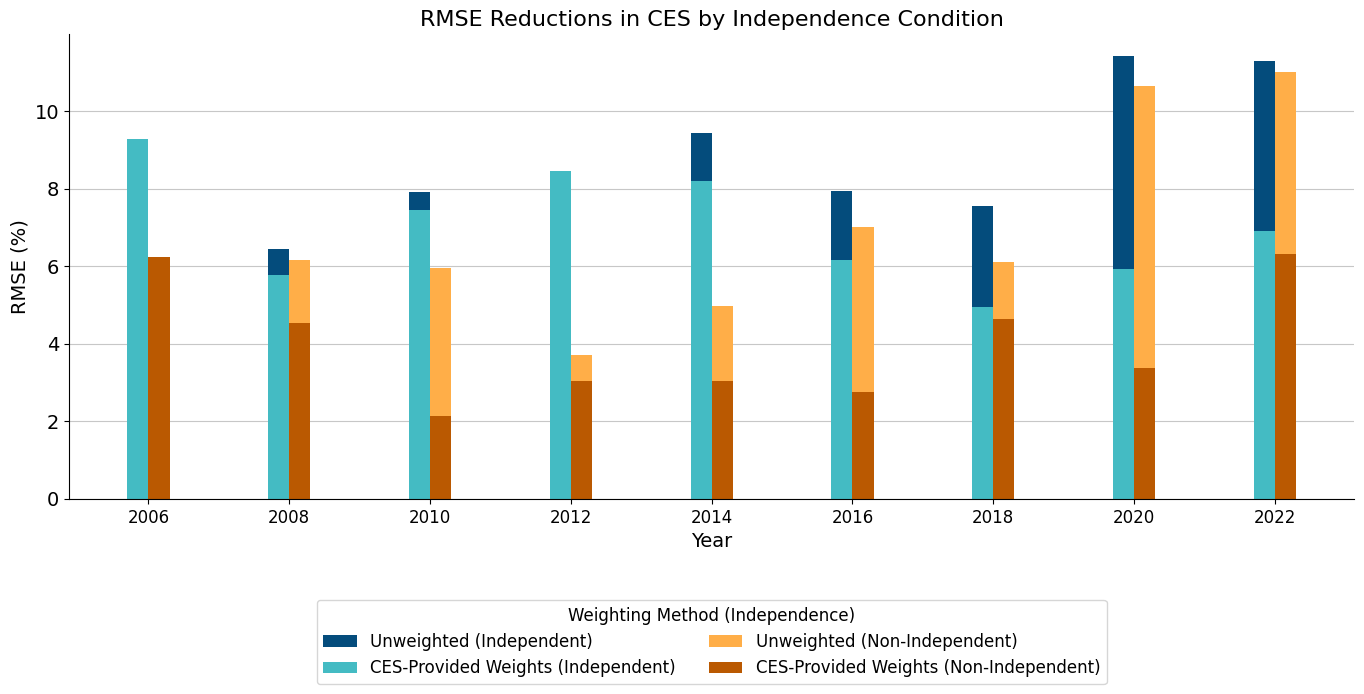

In [5]:
df = pd.read_excel('overall_hist_table.xlsx')

# Filter dataframe to include only Democrat party and RMSE from 0-100%
# Non-Governor, US Senate, President races
df_non_included = df[(df['Party'] == 'Democrat') & 
                     (df['Metric'] == 'RMSE_0-100%') & 
                     (~df['Race'].isin(['Governor', 'US Senate', 'President']))].copy()

# Included races: Governor, US Senate, President
df_included = df[(df['Party'] == 'Democrat') & 
                (df['Metric'] == 'RMSE_0-100%') & 
                (df['Race'].isin(['Governor', 'US Senate', 'President']))].copy()

# Ensure 'Year' is integer to avoid decimal years
df_non_included['Year'] = df_non_included['Year'].astype(int)
df_included['Year'] = df_included['Year'].astype(int)

print("Non-Included Races:")
print(df_non_included)

print("Included Races:")
print(df_included)

# Compute the average RMSE for each year across all races
year_df_non = df_non_included.groupby(['Year', 'Weighting.Method'])['Value'].mean().unstack()
print("Non-Included Yearly RMSE:")
print(year_df_non)

year_df_incl = df_included.groupby(['Year', 'Weighting.Method'])['Value'].mean().unstack()
print("Included Yearly RMSE:")
print(year_df_incl)

# Ensure years are in chronological order
year_df_non = year_df_non.sort_index()
year_df_incl = year_df_incl.sort_index()
print("Sorted Non-Included Yearly RMSE:")
print(year_df_non)

print("Sorted Included Yearly RMSE:")
print(year_df_incl)

# Compute the RMSE reduction for CES Weighted and CES Unweighted
year_df_non['Improvement'] = year_df_non['CES-Unweighted'] - year_df_non['CES-Provided Weights']
year_df_incl['Improvement'] = year_df_incl['CES-Unweighted'] - year_df_incl['CES-Provided Weights']

# Plot RMSE reductions for each year
fig1, ax1 = plt.subplots(figsize=(14, 8))

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add solid lines at y-axis tick marks and make numbers larger
ax1.yaxis.grid(True, linestyle='-', alpha=0.7, zorder=0)
ax1.tick_params(axis='y', labelsize=14)

# Set bar width and positions
bar_width = 0.15  # Reduced from 0.2
years = year_df_non.index.astype(str)
x = np.arange(len(years))

# Plot the CES-Unweighted and CES-Provided Weights for non-included races
ax1.bar(x - bar_width/2, year_df_non['CES-Unweighted'], width=bar_width, color='#044c7c', label='Unweighted (Independent)', zorder=2)
ax1.bar(x - bar_width/2, year_df_non['CES-Provided Weights'], width=bar_width, color='#44bbc3', label='CES-Provided Weights (Independent)', zorder=2)

# Plot the CES-Unweighted and CES-Provided Weights for included races
ax1.bar(x + bar_width/2, year_df_incl['CES-Unweighted'], width=bar_width, color='#ffae48', label='Unweighted (Non-Independent)', zorder=2)
ax1.bar(x + bar_width/2, year_df_incl['CES-Provided Weights'], width=bar_width, color='#ba5901', label='CES-Provided Weights (Non-Independent)', zorder=2)

# Add the text annotations for improvements with larger font size
# for i, (row_non, row_incl) in enumerate(zip(year_df_non.itertuples(), year_df_incl.itertuples())):
#     # Non-included improvement
#     ax1.annotate(f"-{row_non.Improvement:.2f}%", 
#                 xy=(i - bar_width/2, max(row_non._2, row_non._3)),
#                 xytext=(-20, 15), textcoords='offset points',
#                 ha='right', va='bottom', fontsize=12,
#                 arrowprops=dict(arrowstyle='-', color='black', linewidth=0.5))
    
#     # Included improvement  
#     ax1.annotate(f"-{row_incl.Improvement:.2f}%",
#                 xy=(i + bar_width/2, max(row_incl._2, row_incl._3)), 
#                 xytext=(20, 15), textcoords='offset points',
#                 ha='left', va='bottom', fontsize=12,
#                 arrowprops=dict(arrowstyle='-', color='black', linewidth=0.5))

# Customize the plot
ax1.set_title("RMSE Reductions in CES by Independence Condition", fontsize=16)
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("RMSE (%)", fontsize=14)
plt.setp(ax1.get_xticklabels(), rotation=0, ha="center", fontsize=12)

# Explicitly set x-axis ticks to integer years
ax1.set_xticks(x)
ax1.set_xticklabels(years, fontsize=12)

ax1.legend(title="Weighting Method (Independence)", title_fontsize='12', fontsize='12', 
          loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Adjust the layout with more padding at the bottom
plt.tight_layout(pad=2.0, rect=[0, 0.05, 1, 1])

# Save the plot
plt.savefig("rmse_improvement_by_year.png", dpi=300)

# Show the plot
plt.show()

## Recouped Accuracy by Year       

      Year     Party      Weighting.Method       Metric      Value  \
121   2006  Democrat  CES-Provided Weights  RMSE_0-100%  13.029006   
123   2006  Democrat        CES-Unweighted  RMSE_0-100%  12.035632   
125   2006  Democrat              ANESRake  RMSE_0-100%  11.696321   
181   2006  Democrat  CES-Provided Weights  RMSE_0-100%  10.446590   
183   2006  Democrat        CES-Unweighted  RMSE_0-100%  11.350477   
...    ...       ...                   ...          ...        ...   
3783  2022  Democrat        CES-Unweighted  RMSE_0-100%  13.726305   
3785  2022  Democrat              ANESRake  RMSE_0-100%  13.726305   
3841  2022  Democrat  CES-Provided Weights  RMSE_0-100%   5.716128   
3843  2022  Democrat        CES-Unweighted  RMSE_0-100%   9.677577   
3845  2022  Democrat              ANESRake  RMSE_0-100%   9.677577   

                      Race  Num_States  
121       Attorney General          28  
123       Attorney General          28  
125       Attorney General          

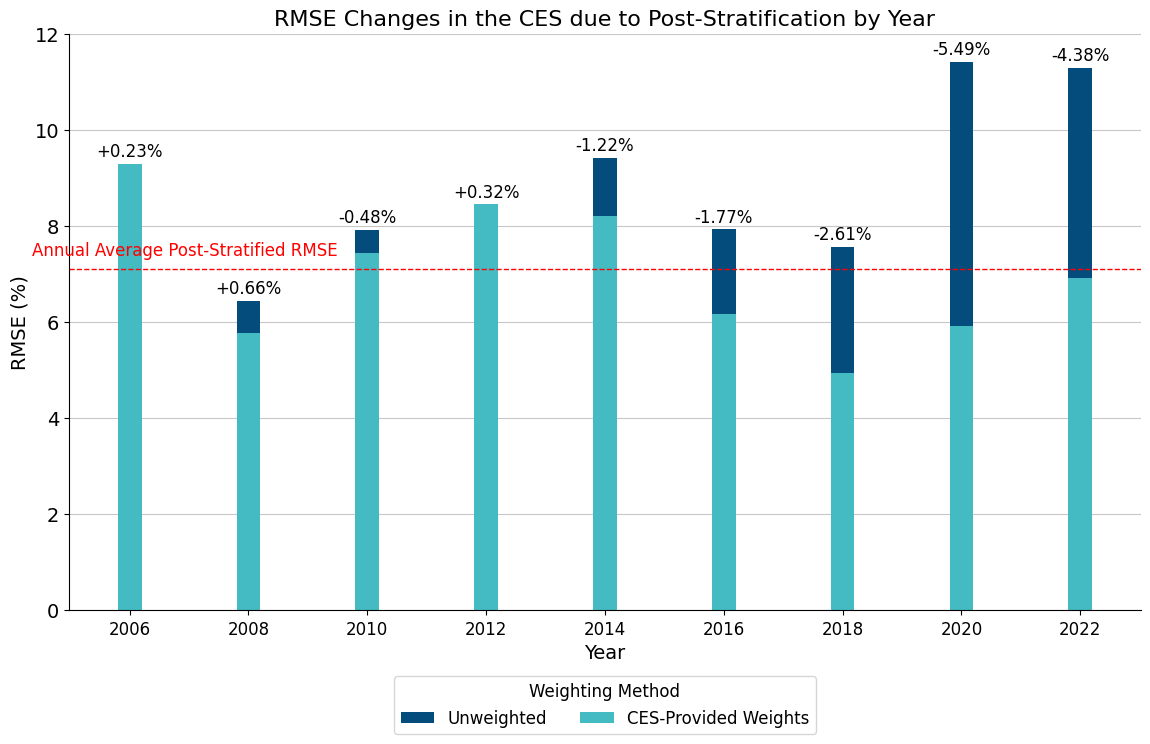

In [26]:
# Read the Excel file
df = pd.read_excel('overall_hist_table.xlsx')

# Filter dataframe to include only Democrat party and RMSE from 0-100%
df_filtered = df[(df['Party'] == 'Democrat') & 
                (df['Metric'] == 'RMSE_0-100%') &
                (~df['Race'].isin(['Governor', 'US Senate', 'President']))].copy()

# Ensure 'Year' is integer to avoid decimal years
df_filtered['Year'] = df_filtered['Year'].astype(int)

print(df_filtered)

# Compute the average RMSE across all races for each year and weighting method
year_df = df_filtered.groupby(['Year', 'Weighting.Method'])['Value'].mean().unstack()
print(year_df)

# Print the average CES-weighted RMSE by year
ces_weighted_rmse = year_df['CES-Provided Weights']
print("Average CES-Weighted RMSE by Year:")
print(ces_weighted_rmse)

# Ensure years are in chronological order
year_df = year_df.sort_index()
print(year_df)

# Compute the RMSE reduction for CES Weighted and CES Unweighted
year_df['Improvement'] = year_df['CES-Unweighted'] - year_df['CES-Provided Weights']

# Plot RMSE reductions for each year
fig1, ax1 = plt.subplots(figsize=(12, 8))

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add solid lines at y-axis tick marks and make numbers larger
ax1.yaxis.grid(True, linestyle='-', alpha=0.7, zorder=0)
ax1.tick_params(axis='y', labelsize=14)

# Set the y-axis limit to ensure the maximum horizontal grid line is at 12
ax1.set_ylim(0, 12)

# Plot the CES-Unweighted RMSE bars
ax1.bar(year_df.index, year_df['CES-Unweighted'], color='#044c7c', width=0.4, label='Unweighted', zorder=2)

# Plot the CES Weighted RMSE bars on top of the unweighted bars with the same width
ax1.bar(year_df.index, year_df['CES-Provided Weights'], color='#44bbc3', width=0.4, label='CES-Provided Weights', zorder=2)
# Plot a horizontal line with the average across all years
ax1.axhline(y=7.1, color='red', linestyle='--', linewidth=1)

# Add the label "Annual Average RMSE" without the arrow
x_position = year_df.index[int(len(year_df.index) * 0.25)]
ax1.text(x_position - .5, 7.5, 'Annual Average Post-Stratified RMSE', fontsize=12, color='red', ha='right', va='center')

# Add the text annotations for improvements with larger font size
for i, row in enumerate(year_df.itertuples()):
    improvement_label = f"-{row.Improvement:.2f}%" if row.Index not in [2006, 2008, 2012] else f"+{abs(row.Improvement):.2f}%"
    ax1.text(row.Index, max(row._2, row._3) + 0.15, 
             improvement_label, color='black', ha="center", fontsize=12)

# Customize the plot
ax1.set_title("RMSE Changes in the CES due to Post-Stratification by Year", fontsize=16)
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("RMSE (%)", fontsize=14)
plt.setp(ax1.get_xticklabels(), rotation=0, ha="center", fontsize=12)

# Explicitly set x-axis ticks to integer years
ax1.set_xticks(year_df.index)
ax1.set_xticklabels(year_df.index.astype(int).astype(str), fontsize=12)

ax1.legend(title="Weighting Method", title_fontsize='12', fontsize='12', 
          loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Adjust the layout with less padding at the bottom
plt.tight_layout(pad=2.0, rect=[0, 0.02, 1, 1])

# Save the plot
plt.savefig("rmse_improvement_by_year.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Reductions by Race

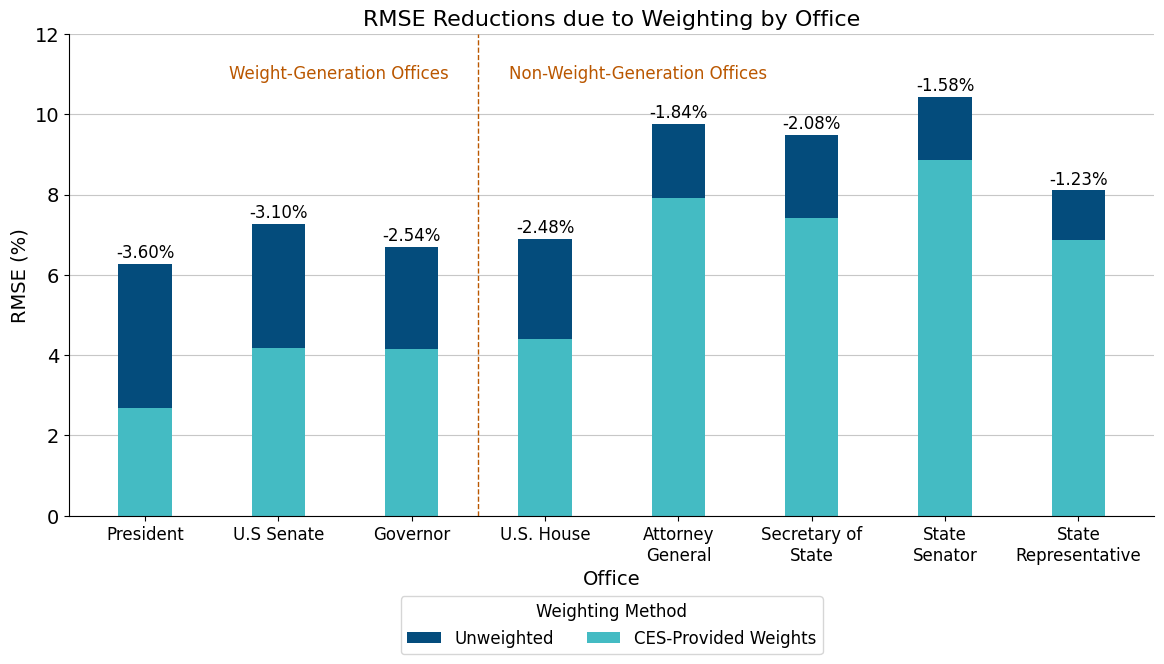

In [163]:
df = pd.read_excel('overall_hist_table.xlsx')

# Filter dataframe to include only Democrat party, RMSE from 0-100%, and exclude 'anesrake'
df_filtered = df[(df['Party'] == 'Democrat') & 
                 (df['Metric'] == 'RMSE_0-100%') & 
                 (df['Weighting.Method'] != 'ANESRake')]

#print(df_filtered)

# Compute the average RMSE for each race across all years
race_df = df_filtered.groupby(['Race', 'Weighting.Method'])['Value'].mean().unstack()
#print(race_df)

# Reorder the races and format labels with line breaks
labels = ['President', 'U.S Senate', 'Governor', 'U.S. House', 'Attorney\nGeneral', 'Secretary of\nState', 'State\nSenator', 'State\nRepresentative']
desired_order = ['President', 'US Senate', 'Governor', 'US House', 'Attorney General', 'Secretary of State', 'State Senator', 'State Representative']
race_df = race_df.reindex(desired_order)

# Compute the RMSE reduction for CES Weighted and CES Unweighted
race_df['Improvement'] = race_df['CES-Unweighted'] - race_df['CES-Provided Weights']

# Plot RMSE reductions for each race across all years
fig1, ax1 = plt.subplots(figsize=(12, 8))

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add solid lines at y-axis tick marks and make numbers larger
ax1.yaxis.grid(True, linestyle='-', alpha=0.7, zorder=0)  # Changed zorder to 0
ax1.tick_params(axis='y', labelsize=14)

# Set the y-axis limit to ensure the max horizontal grid line is at 12%
ax1.set_ylim(0, 12)

# Plot the CES-Unweighted RMSE bars
ax1.bar(labels, race_df['CES-Unweighted'], color='#044c7c', width=0.4, label='Unweighted', zorder=2)

# Plot the CES Weighted RMSE bars on top of the unweighted bars with the same width
ax1.bar(labels, race_df['CES-Provided Weights'], color='#44bbc3', width=0.4, label='CES-Provided Weights', zorder=2)

# Add the text annotations for improvements with larger font size
for i, row in enumerate(race_df.itertuples()):
    ces_unweighted = row._1
    ces_provided_weights = row._2
    ax1.text(labels[i], max(ces_unweighted, ces_provided_weights) + 0.15, 
             f"-{row.Improvement:.2f}%", color='black', ha="center", fontsize=12)  # Increased fontsize from default to 14
# Add a vertical line between Governor and US House
ax1.axvline(x=2.5, color='#ba5700', linestyle='--', linewidth=1)

# Add a label for Weight-Generation Offices
ax1.text(1.45, 11, "Weight-Generation Offices", fontsize=12, color='#ba5700', ha='center', va='center', rotation='horizontal')
ax1.text(3.7, 11, "Non-Weight-Generation Offices", fontsize=12, color='#ba5700', ha='center', va='center', rotation='horizontal')
# Customize the plot
ax1.set_title("RMSE Reductions due to Weighting by Office", fontsize=16)
ax1.set_xlabel("Office", fontsize=14)
ax1.set_ylabel("RMSE (%)", fontsize=14)
plt.setp(ax1.get_xticklabels(), rotation=0, ha="center", fontsize=12)

ax1.legend(title="Weighting Method", title_fontsize='12', fontsize='12', 
          loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Adjust the layout with less padding at the bottom
plt.tight_layout(pad=2.0, rect=[0, 0.1, 1, 1])

# Save the plot
plt.savefig("rmse_improvement_by_race.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

## Demographic dot plot

['60k-100k' 'South' 'Employed' 'Voted' 'In person' 'Not current member'
 'Non-veteran' 'Citizen']


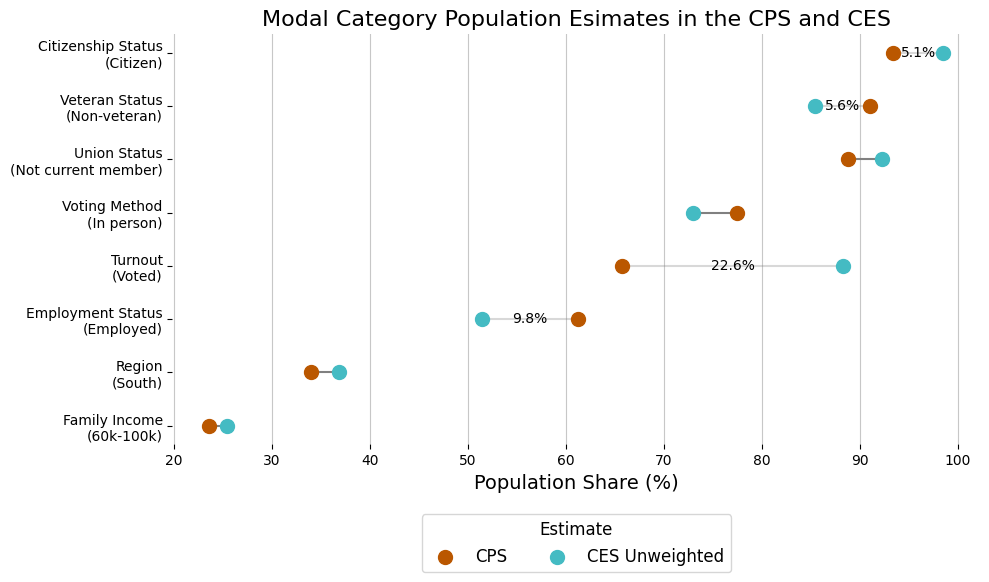

In [256]:
# Load the data
average_modal_summary = pd.read_excel('average_modal_summary.xlsx')

# Exclude specified variables
average_modal_summary = average_modal_summary[~average_modal_summary['Variable'].isin(['HISPAN_rc', 'AGE_GROUP_rc', 'SEX_rc', 'EDUC_rc'])]

# Sort the data by CPS percentage in increasing order
average_modal_summary = average_modal_summary.sort_values(by='Average_CPS')

# Mapping for category labels
category_mapping = {
    'CITIZEN_rc': 'Citizenship Status',
    'EDUC_rc': 'Highest Education',
    'EMPSTAT_rc': 'Employment Status',
    'FAMINC_rc': 'Family Income',
    'REGION_rc': 'Region',
    'VOTEHOW_rc': 'Voting Method',
    'VOTED_rc': 'Turnout',
    'UNION_rc': 'Union Status',
    'VETSTAT_rc': 'Veteran Status'
}

# Apply the mapping to change category labels
average_modal_summary['Variable'] = average_modal_summary['Variable'].map(category_mapping)

# Change specific category names
average_modal_summary['Category'] = average_modal_summary['Category'].replace({
    'Not current union member': 'Not current member',
    '$60 000 - $99 999': '60k-100k'
})

# print unique categories
print(average_modal_summary['Category'].unique())

# Create the dot plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the CPS percentages
ax.scatter(average_modal_summary['Average_CPS'], average_modal_summary['Variable'], color='#ba5700', label='CPS', s=100, zorder=3)

# Plot the CES Unweighted percentages
ax.scatter(average_modal_summary['Average_CES_Unweighted'], average_modal_summary['Variable'], color='#44bbc3', label='CES Unweighted', s=100, zorder=3)

# Add connecting lines between the dots and labels for differences exceeding 5%
for i, row in average_modal_summary.iterrows():
    difference = abs(row['Average_CPS'] - row['Average_CES_Unweighted'])
    line_color = 'gray' if difference <= 5 else 'gray'  # Default color is gray
    line_alpha = 1.0 if difference <= 5 else 0.3  # Make line transparent if difference exceeds 5%
    ax.plot([row['Average_CPS'], row['Average_CES_Unweighted']], [row['Variable'], row['Variable']], color=line_color, linestyle='-', zorder=2, alpha=line_alpha)
    if difference > 5:
        ax.text((row['Average_CPS'] + row['Average_CES_Unweighted']) / 2, row['Variable'], f"{difference:.1f}%", 
                color='black', ha='center', va='center', fontsize=10)

# Customize the y-axis to include both the variable and the category on separate lines
ax.set_yticks(average_modal_summary['Variable'])
ax.set_yticklabels([
    f"{row['Variable']}\n({row['Category']})"
    for _, row in average_modal_summary.iterrows()
], fontsize=10)  # Remove bold from y-axis labels

# Customize the plot
ax.set_xlabel('Population Share (%)', fontsize=14)
ax.set_ylabel('', fontsize=14)  # Make y-axis label bold
ax.set_title('Modal Category Population Esimates in the CPS and CES', fontsize=16)

# Move the legend to be horizontal below the figure
ax.legend(title='Estimate', title_fontsize='12', fontsize='12', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Show grid lines
ax.xaxis.grid(True, linestyle='-', alpha=0.7, zorder=0)

# Remove plot borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("dot_plot_cps_ces_unweighted.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Line plot for office over time

Race  Attorney General  Secretary of State  State Representative  \
Year                                                               
2006         13.029006           10.446590              6.684543   
2008               NaN                 NaN              4.982923   
2010         10.531054            6.381254              5.264303   
2012         15.092283           10.756393              6.268953   
2014          7.865297           10.417533              5.677441   
2016          4.631414            9.261344              5.898857   
2018          3.947457            3.987781              8.476318   
2020          4.204363            3.742230              8.166668   
2022          4.043999            4.357130             10.440107   

Race  State Senator  US House  
Year                           
2006      10.948266  5.349931  
2008       6.108571  6.236636  
2010      10.544882  4.484702  
2012       7.187307  2.945518  
2014      12.926267  4.111247  
2016       7.593073  3.4287

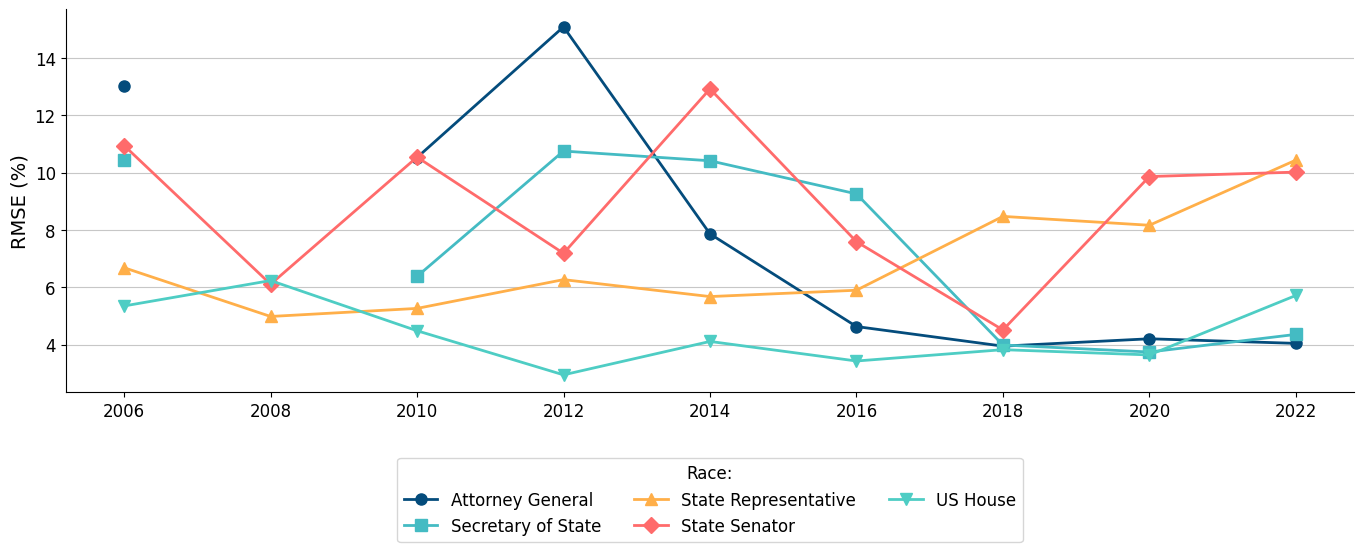

In [164]:
df = pd.read_excel('overall_hist_table.xlsx')

# Filter dataframe to include only Democrat party and RMSE from 0-100%
df = df[(df['Party'] == 'Democrat') & 
        (df['Metric'] == 'RMSE_0-100%') & 
        (df['Weighting.Method'] == 'CES-Provided Weights') &
        (~df['Race'].isin(['US Senate', 'President', 'Governor']))]

# Compute the average RMSE for each year and race
average_rmse = df.groupby(['Year', 'Race'])['Value'].mean().unstack()

print(average_rmse)

# Create the line plot
fig, ax = plt.subplots(figsize=(14, 6))

# Define colors for different races
colors = ['#044c7c', '#44bbc3', '#ffaf49', '#ff6b6b', '#4ecdc4']  
markers = ['o', 's', '^', 'D', 'v']  

# Plot lines with markers for each race
for i, race in enumerate(average_rmse.columns):
    ax.plot(average_rmse.index, average_rmse[race], 
            color=colors[i % len(colors)], marker=markers[i % len(markers)], 
            linewidth=2, markersize=8, label=race)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle='-', alpha=0.7, zorder=0)

# Customize axis labels and ticks
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('RMSE (%)', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Move legend to bottom and make it horizontal
plt.legend(title='Race:', loc='upper center', 
          bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=12, 
          title_fontsize=12)

# Adjust layout
plt.tight_layout(pad=2.0)

# Save the plot
plt.savefig('average_rmse_by_race_lineplot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

## Republican 0-100% Averged Across All Races

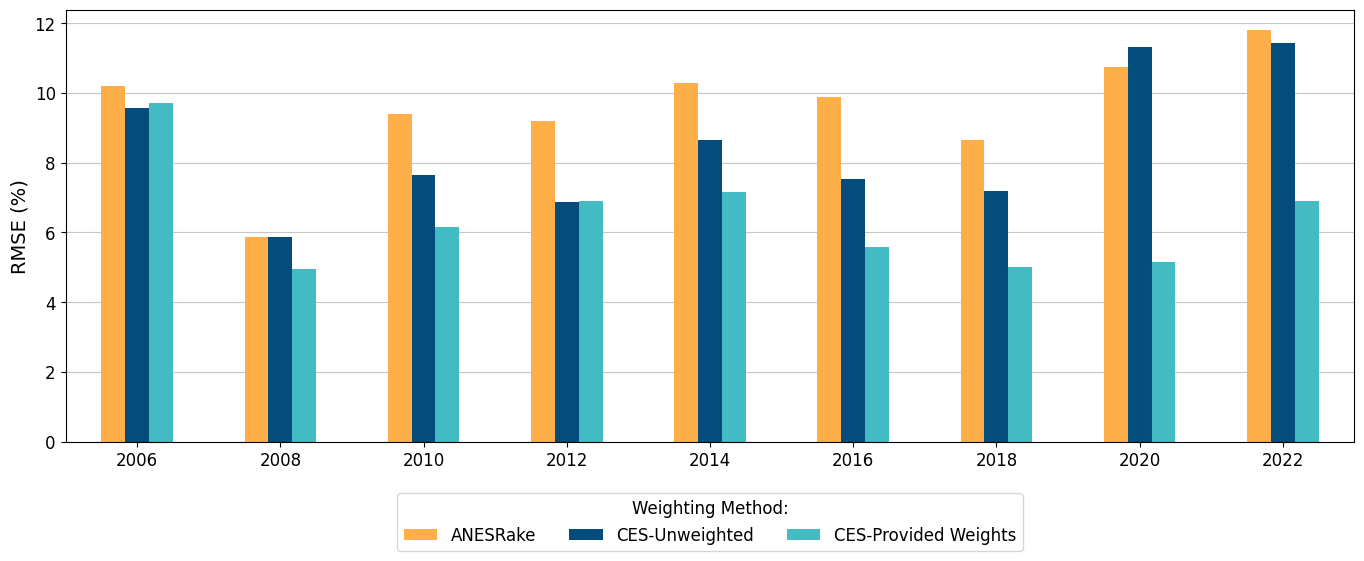

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('overall_hist_table.xlsx')

# Filter dataframe to include only Democrat party and RMSE from 0-100%
# df = df[(df['Party'] == 'Democrat') & (df['Metric'] == 'RMSE_0-100%')]

df = df[(df['Party'] == 'Democrat') & 
        (df['Metric'] == 'RMSE_0-100%') & 
        (~df['Race'].isin(['US Senate', 'President', 'Governor']))]


# Compute the average RMSE for each year and weighting method
average_rmse = df.groupby(['Year', 'Weighting.Method'])['Value'].mean().unstack()

# Ensure the columns are in the order: ANESRake, CES-Unweighted, CES-Provided Weights
column_order = ['ANESRake', 'CES-Unweighted', 'CES-Provided Weights']
average_rmse = average_rmse[column_order]

# Plotting the histogram
colors = ['#ffaf49', '#044c7c', '#44bbc3']  # New color palette
ax = average_rmse.plot(kind='bar', figsize=(14, 6), color=colors, zorder=2)

# Set X-axis labels to be full years and horizontal
ax.set_xticklabels(average_rmse.index, rotation=0)

# Add axis labels and set title to blank with larger font size
plt.xlabel('', fontsize=14)
plt.ylabel('RMSE (%)', fontsize=14)
plt.title('', fontsize=16)

# Add horizontal grid lines behind the bars
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

# Set tick parameters for larger font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Move legend to bottom and make it horizontal with larger font size
plt.legend(title='Weighting Method:', labels=['ANESRake', 'CES-Unweighted', 'CES-Provided Weights'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12, title_fontsize=12)

# Adjust layout to make room for the legend and reduce extra space
plt.tight_layout(pad=2.0)

# Save the plot as a file
plt.savefig('average_rmse_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

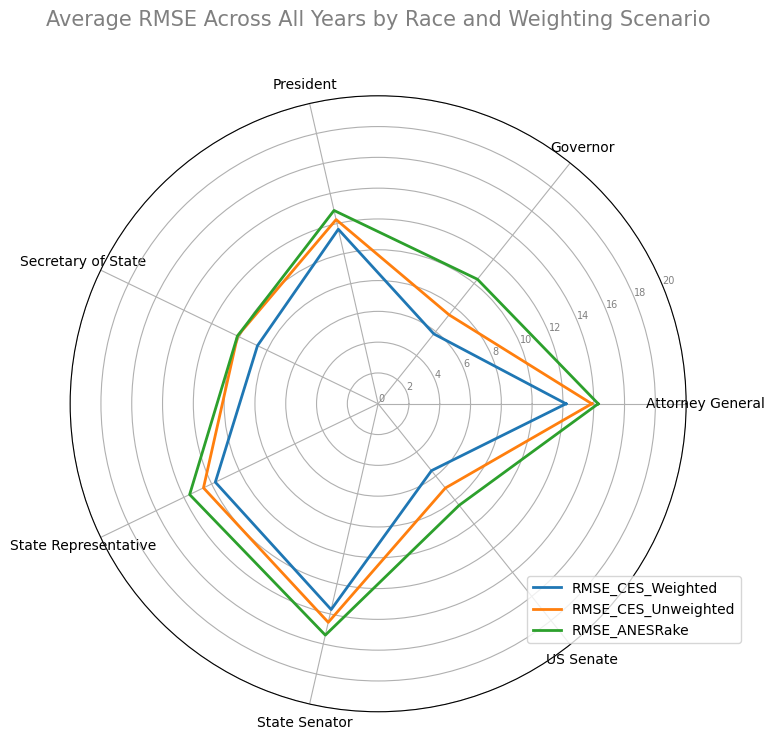

In [22]:

# Define the data
data = {
    'Attorney General': [12.20028, 13.87323, 14.29116],
    'Governor': [5.801932, 7.387713, 10.341256],
    'President': [11.62437, 12.26785, 12.87553],
    'Secretary of State': [8.69624, 10.13215, 10.14099],
    'State Representative': [11.73483, 12.58729, 13.58495],
    'State Senator': [13.70692, 14.55819, 15.40968],
    'US Senate': [5.555901, 6.999940, 8.434557]
}

categories = list(data.keys())
labels = ['RMSE_CES_Weighted', 'RMSE_CES_Unweighted', 'RMSE_ANESRake']
N = len(categories)

# Convert the data to a DataFrame
df = pd.DataFrame(data, index=labels)

# Prepare the angles
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Increase the number of gridlines
ax.set_yticks(range(0, 21, 2))

# Plot each data series
for i in range(len(labels)):
    values = df.loc[labels[i]].tolist()
    values += values[:1]  # Ensure it forms a closed loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=labels[i])
    # Do not fill the polygons, so omit ax.fill()

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.yticks(range(0, 21, 2), ["0", "2", "4", "6", "8", "10", "12", "14", "16", "18", "20"], color="grey", size=7)
plt.ylim(0, 20)
plt.title('Average RMSE Across All Years by Race and Weighting Scenario', size=15, color='grey', y=1.1)

# Add a legend
plt.legend(loc='lower right', bbox_to_anchor=(1.1, 0.1))

plt.savefig('radar_plot.png', bbox_inches='tight')

# Show the plot
plt.show()

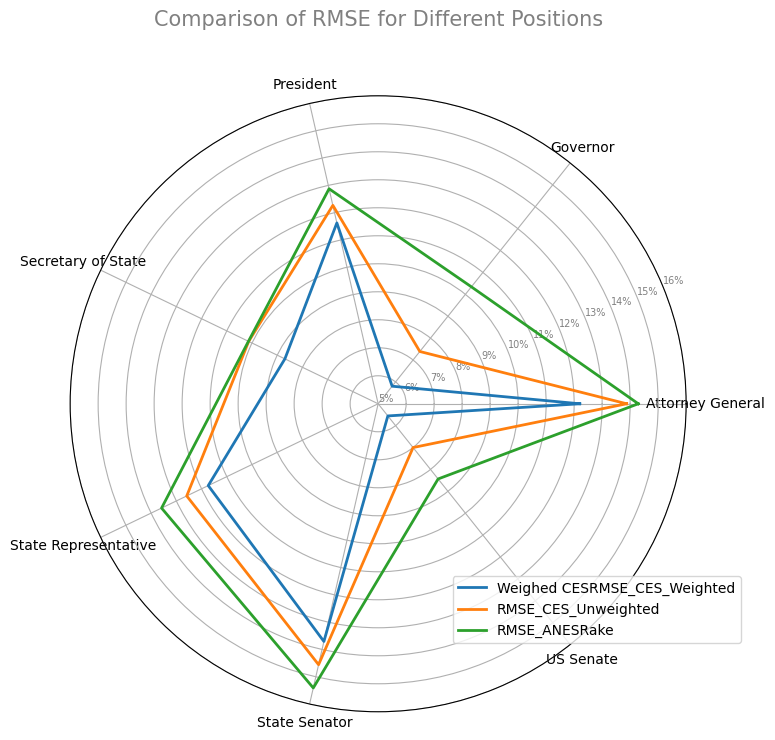

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Define the data
data = {
    'Attorney General': [12.20028, 13.87323, 14.29116],
    'Governor': [5.801932, 7.387713, 10.341256],
    'President': [11.62437, 12.26785, 12.87553],
    'Secretary of State': [8.69624, 10.13215, 10.14099],
    'State Representative': [11.73483, 12.58729, 13.58495],
    'State Senator': [13.70692, 14.55819, 15.40968],
    'US Senate': [5.555901, 6.999940, 8.434557]
}

categories = list(data.keys())
labels = ['Weighed CESRMSE_CES_Weighted', 'RMSE_CES_Unweighted', 'RMSE_ANESRake']
N = len(categories)

# Convert the data to a DataFrame
df = pd.DataFrame(data, index=labels)

# Prepare the angles
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set up the y-axis for 5% to 16% range and label with percentages
y_ticks = range(5, 17)  # This creates ticks from 5% to 16%
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{ytick}%" for ytick in y_ticks], color="grey", size=7)
plt.ylim(5, 16)

# Plot each data series
for i in range(len(labels)):
    values = df.loc[labels[i]].tolist()
    values += values[:1]  # Ensure it forms a closed loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=labels[i])
    # Do not fill the polygons, so omit ax.fill()

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Comparison of RMSE for Different Positions', size=15, color='grey', y=1.1)

# Add a legend
plt.legend(loc='lower right', bbox_to_anchor=(1.1, 0.1))

# Save the plot
#plt.savefig('radar_plot.png', bbox_inches='tight')

# Show the plot
plt.show()

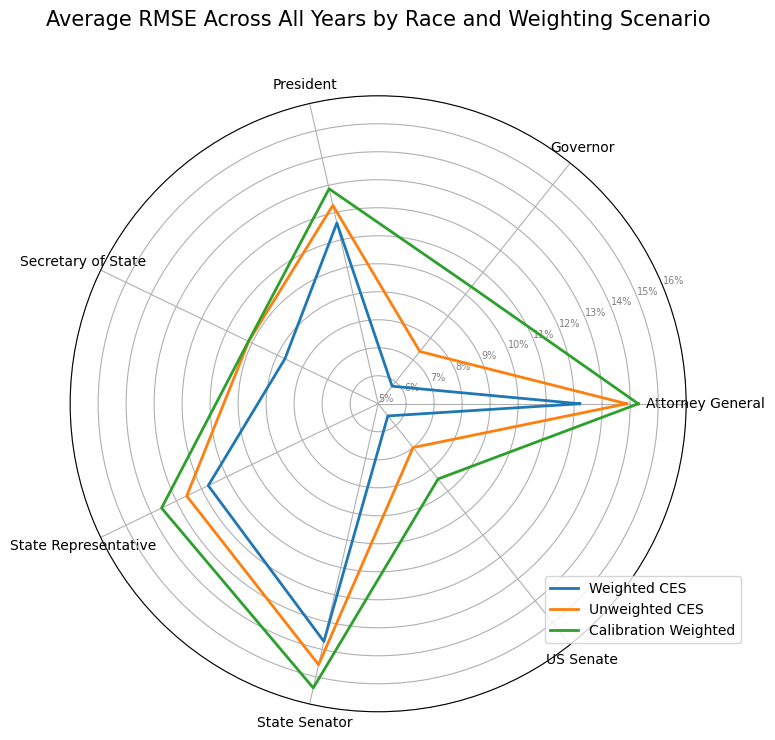

In [24]:
# Define the data
data = {
    'Attorney General': [12.20028, 13.87323, 14.29116],
    'Governor': [5.801932, 7.387713, 10.341256],
    'President': [11.62437, 12.26785, 12.87553],
    'Secretary of State': [8.69624, 10.13215, 10.14099],
    'State Representative': [11.73483, 12.58729, 13.58495],
    'State Senator': [13.70692, 14.55819, 15.40968],
    'US Senate': [5.555901, 6.999940, 8.434557]
}

categories = list(data.keys())
labels = ['Weighted CES', 'Unweighted CES', 'Calibration Weighted']
N = len(categories)

# Convert the data to a DataFrame
df = pd.DataFrame(data, index=['RMSE_CES_Weighted', 'RMSE_CES_Unweighted', 'RMSE_ANESRake'])

# Prepare the angles
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set up the y-axis for 5% to 16% range and label with percentages
y_ticks = range(5, 17)  # This creates ticks from 5% to 16%
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{ytick}%" for ytick in y_ticks], color="grey", size=7)
plt.ylim(5, 16)

# Plot each data series
for i in range(len(labels)):
    values = df.loc[df.index[i]].tolist()
    values += values[:1]  # Ensure it forms a closed loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=labels[i])
    # Do not fill the polygons, so omit ax.fill()

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Average RMSE Across All Years by Race and Weighting Scenario', size=15, color='black', y=1.1)

# Add a legend
plt.legend(loc='lower right', bbox_to_anchor=(1.1, 0.1))

# Save the plot
#plt.savefig('radar_plot.png', bbox_inches='tight')

# Show the plot
plt.show()

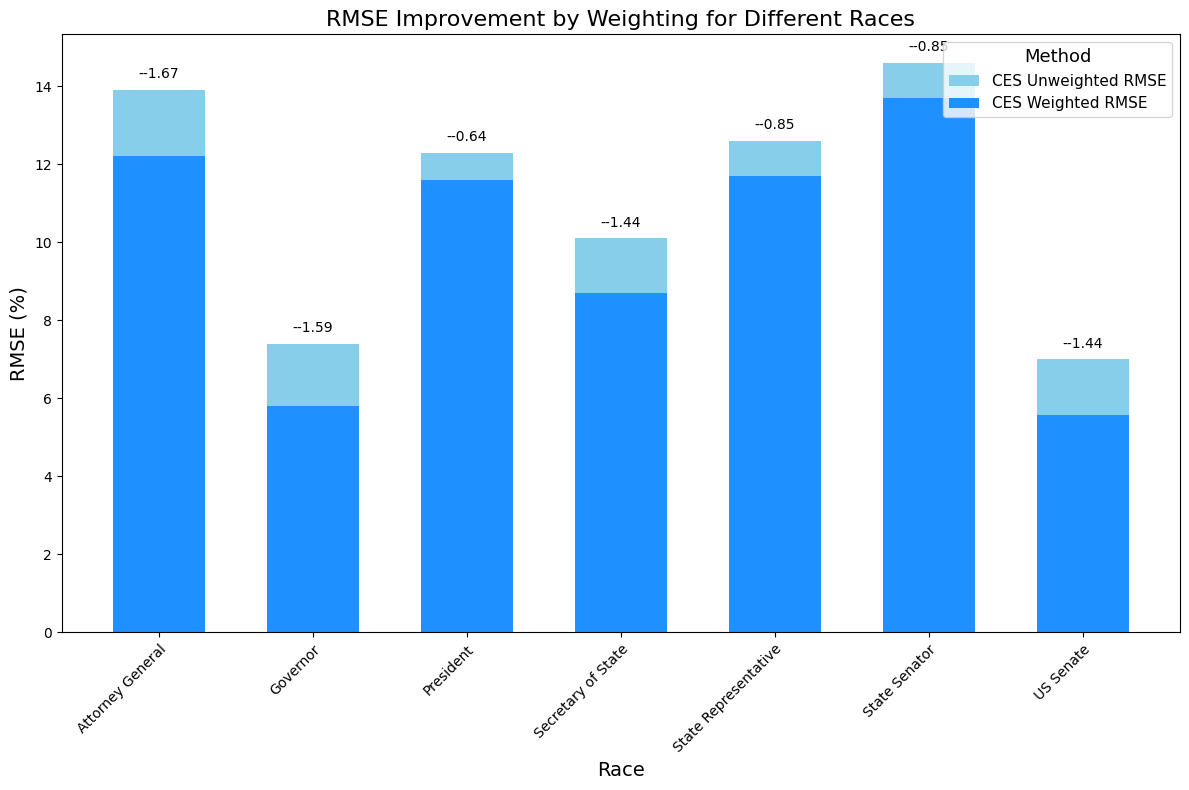

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the sample data
data = {
    'Race': ['Attorney General', 'Governor', 'President', 'Secretary of State', 
             'State Representative', 'State Senator', 'US Senate'],
    'RMSE_CES_Weighted': [12.2, 5.80, 11.6, 8.70, 11.7, 13.7, 5.56],
    'RMSE_CES_Unweighted': [13.9, 7.39, 12.3, 10.1, 12.6, 14.6, 7.00],
    'Improvement': [-1.67, -1.59, -0.643, -1.44, -0.852, -0.851, -1.44]
}

df = pd.DataFrame(data)

# Set up matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the RMSE_CES_Unweighted bars
ax.bar(df['Race'], df['RMSE_CES_Unweighted'], color='skyblue', width=0.6, label='CES Unweighted RMSE')

# Plot the RMSE_CES_Weighted bars on top of the unweighted bars with the same width
ax.bar(df['Race'], df['RMSE_CES_Weighted'], color='dodgerblue', width=0.6, label='CES Weighted RMSE')

# Add the text annotations for improvements
for index, row in df.iterrows():
    ax.text(index, row['RMSE_CES_Unweighted'] + 0.3, f"-{row['Improvement']:.2f}", color='black', ha="center")

# Customize the plot
ax.set_title("RMSE Improvement by Weighting for Different Races", fontsize=16)
ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("RMSE (%)", fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.legend(title="Method", title_fontsize='13', fontsize='11', loc='upper right')

# Tighten layout to ensure everything fits without overlap
plt.tight_layout()

# Save the plot
#plt.savefig("rmse_improvement_plot.png", dpi=300)

# Show the plot
plt.show()

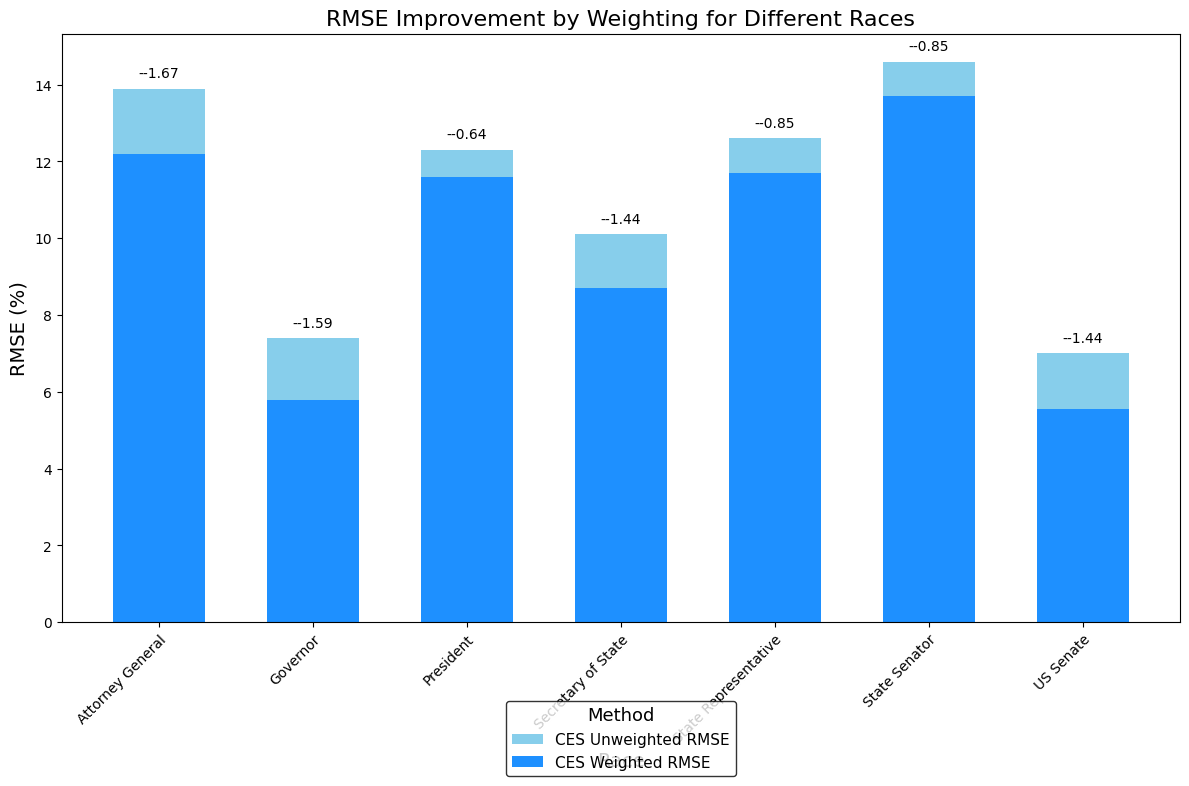

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the sample data
data = {
    'Race': ['Attorney General', 'Governor', 'President', 'Secretary of State', 
             'State Representative', 'State Senator', 'US Senate'],
    'RMSE_CES_Weighted': [12.2, 5.80, 11.6, 8.70, 11.7, 13.7, 5.56],
    'RMSE_CES_Unweighted': [13.9, 7.39, 12.3, 10.1, 12.6, 14.6, 7.00],
    'Improvement': [-1.67, -1.59, -0.643, -1.44, -0.852, -0.851, -1.44]
}

df = pd.DataFrame(data)

# Set up matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the RMSE_CES_Unweighted bars
ax.bar(df['Race'], df['RMSE_CES_Unweighted'], color='skyblue', width=0.6, label='CES Unweighted RMSE')

# Plot the RMSE_CES_Weighted bars on top of the unweighted bars with the same width
ax.bar(df['Race'], df['RMSE_CES_Weighted'], color='dodgerblue', width=0.6, label='CES Weighted RMSE')

# Add the text annotations for improvements
for index, row in df.iterrows():
    ax.text(index, row['RMSE_CES_Unweighted'] + 0.3, f"-{row['Improvement']:.2f}", color='black', ha="center")

# Customize the plot
ax.set_title("RMSE Improvement by Weighting for Different Races", fontsize=16)
ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("RMSE (%)", fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Manually adjust the legend position
legend = ax.legend(title="Method", title_fontsize='13', fontsize='11', loc='upper center', bbox_to_anchor=(0.5, -0.12))
legend.get_frame().set_edgecolor('black')

# Tighten layout to ensure everything fits without overlap
plt.tight_layout()

# Save the plot
plt.savefig("rmse_improvement_plot.png", dpi=300)

# Show the plot
plt.show()

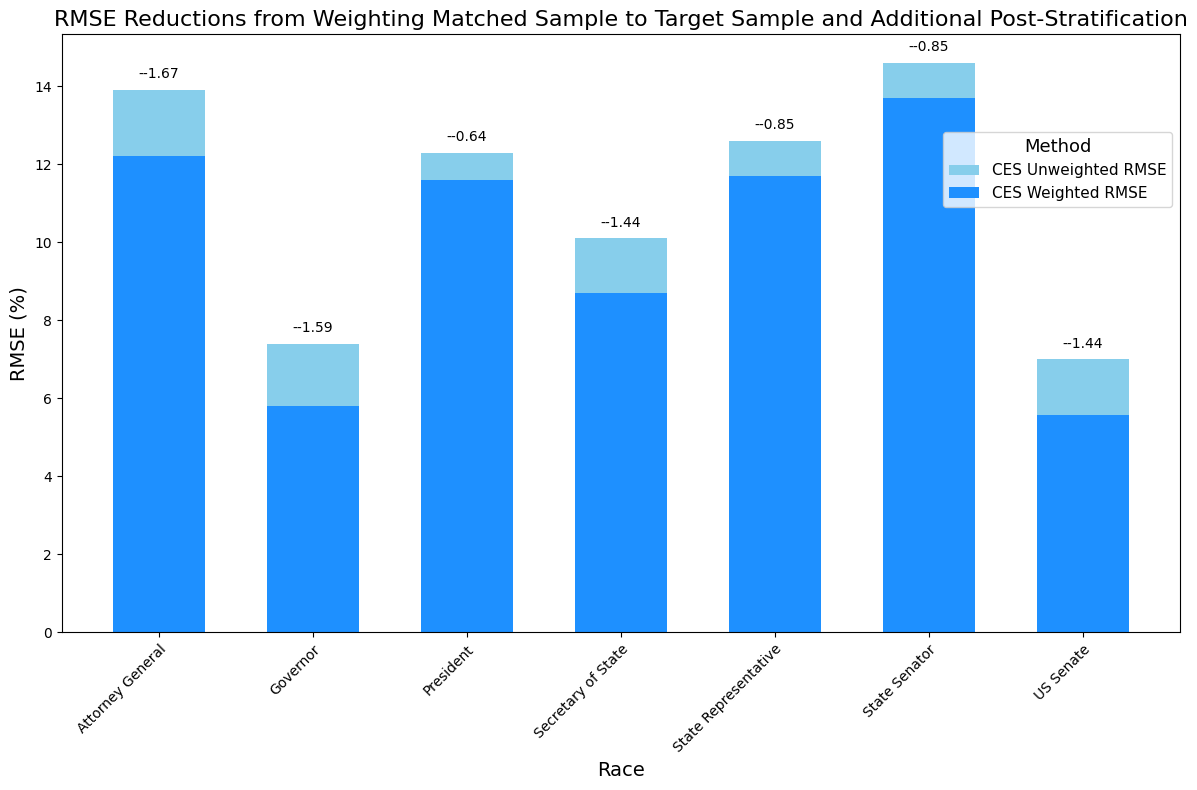

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the sample data
data = {
    'Race': ['Attorney General', 'Governor', 'President', 'Secretary of State', 
             'State Representative', 'State Senator', 'US Senate'],
    'RMSE_CES_Weighted': [12.2, 5.80, 11.6, 8.70, 11.7, 13.7, 5.56],
    'RMSE_CES_Unweighted': [13.9, 7.39, 12.3, 10.1, 12.6, 14.6, 7.00],
    'Improvement': [-1.67, -1.59, -0.643, -1.44, -0.852, -0.851, -1.44]
}

df = pd.DataFrame(data)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the RMSE_CES_Unweighted bars
ax.bar(df['Race'], df['RMSE_CES_Unweighted'], color='skyblue', width=0.6, label='CES Unweighted RMSE')

# Plot the RMSE_CES_Weighted bars on top of the unweighted bars with the same width
ax.bar(df['Race'], df['RMSE_CES_Weighted'], color='dodgerblue', width=0.6, label='CES Weighted RMSE')

# Add the text annotations for improvements
for index, row in df.iterrows():
    ax.text(index, row['RMSE_CES_Unweighted'] + 0.3, f"-{row['Improvement']:.2f}", color='black', ha="center")

# Customize the plot
ax.set_title("RMSE Reductions from Weighting Matched Sample to Target Sample and Additional Post-Stratification", fontsize=16)
ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("RMSE (%)", fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Move the legend to avoid covering the bars
ax.legend(title="Method", title_fontsize='13', fontsize='11', loc='upper right', bbox_to_anchor=(1, 0.85))

# Tighten layout to ensure everything fits without overlap
plt.tight_layout()

# Save the plot
plt.savefig("rmse_improvement_plot.png", dpi=300)

# Show the plot
plt.show()